This dataset is collected from National Health Insurance Service in Korea. All personal information and sensitive data were excluded.

In [1]:
#Import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# read dataset
df = pd.read_csv('smoking_driking_dataset_Ver01.csv')

In [3]:
#checking data 
df.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991346 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991346 non-null  object 
 1   age               991346 non-null  int64  
 2   height            991346 non-null  int64  
 3   weight            991346 non-null  int64  
 4   waistline         991346 non-null  float64
 5   sight_left        991346 non-null  float64
 6   sight_right       991346 non-null  float64
 7   hear_left         991346 non-null  float64
 8   hear_right        991346 non-null  float64
 9   SBP               991346 non-null  float64
 10  DBP               991346 non-null  float64
 11  BLDS              991346 non-null  float64
 12  tot_chole         991346 non-null  float64
 13  HDL_chole         991346 non-null  float64
 14  LDL_chole         991346 non-null  float64
 15  triglyceride      991346 non-null  float64
 16  hemoglobin        99

In [5]:
df['sex'].value_counts()

Male      526415
Female    464931
Name: sex, dtype: int64

In [6]:
#Male = 0 Female = 1
dummy1 = pd.get_dummies(df['sex'])
dummy1.head()

,Female,Male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [7]:
df = pd.concat((df, dummy1), axis=1)
df.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN,Female,Male
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y,0,1
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N,0,1
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N,0,1
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N,0,1
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N,0,1


In [8]:
df = df.drop(['sex'], axis = 1)

In [9]:
df = df.drop(['Female'], axis = 1)

In [10]:
df.head()

,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,...,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN,Male
0,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,80.0,...,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y,1
1,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,82.0,...,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N,1
2,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,70.0,...,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N,1
3,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,87.0,...,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N,1
4,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,82.0,...,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N,1


In [11]:
df = df.rename(columns={'Male':'Sex'})

In [12]:
#Drinker or Not
df['DRK_YN'].value_counts()

N    495858
Y    495488
Name: DRK_YN, dtype: int64

In [13]:
#Yes = 0 No = 1
dummy2 = pd.get_dummies(df['DRK_YN'])
dummy2.head()

,N,Y
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0


In [14]:
df = pd.concat((df, dummy2), axis=1)
df.head()

,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,...,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN,Sex,N,Y
0,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,80.0,...,1.0,1.0,21.0,35.0,40.0,1.0,Y,1,0,1
1,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,82.0,...,1.0,0.9,20.0,36.0,27.0,3.0,N,1,1,0
2,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,70.0,...,1.0,0.9,47.0,32.0,68.0,1.0,N,1,1,0
3,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,87.0,...,1.0,1.1,29.0,34.0,18.0,1.0,N,1,1,0
4,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,82.0,...,1.0,0.8,19.0,12.0,25.0,1.0,N,1,1,0


In [15]:
df = df.drop(['DRK_YN'], axis = 1)

In [16]:
df = df.drop(['Y'], axis = 1)

In [17]:
df = df.rename(columns={'N':'DRK_YN'})

In [18]:
df.head()

,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,...,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,Sex,DRK_YN
0,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,80.0,...,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,1,0
1,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,82.0,...,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,1,1
2,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,70.0,...,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,1,1
3,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,87.0,...,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,1,1
4,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,82.0,...,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,1,1


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'height'}>,
        <AxesSubplot:title={'center':'weight'}>,
        <AxesSubplot:title={'center':'waistline'}>],
       [<AxesSubplot:title={'center':'sight_left'}>,
        <AxesSubplot:title={'center':'sight_right'}>,
        <AxesSubplot:title={'center':'hear_left'}>,
        <AxesSubplot:title={'center':'hear_right'}>],
       [<AxesSubplot:title={'center':'SBP'}>,
        <AxesSubplot:title={'center':'DBP'}>,
        <AxesSubplot:title={'center':'BLDS'}>,
        <AxesSubplot:title={'center':'tot_chole'}>],
       [<AxesSubplot:title={'center':'HDL_chole'}>,
        <AxesSubplot:title={'center':'LDL_chole'}>,
        <AxesSubplot:title={'center':'triglyceride'}>,
        <AxesSubplot:title={'center':'hemoglobin'}>],
       [<AxesSubplot:title={'center':'urine_protein'}>,
        <AxesSubplot:title={'center':'serum_creatinine'}>,
        <AxesSubplot:title={'center':'SGOT_AST'}>,
        <AxesSubplo

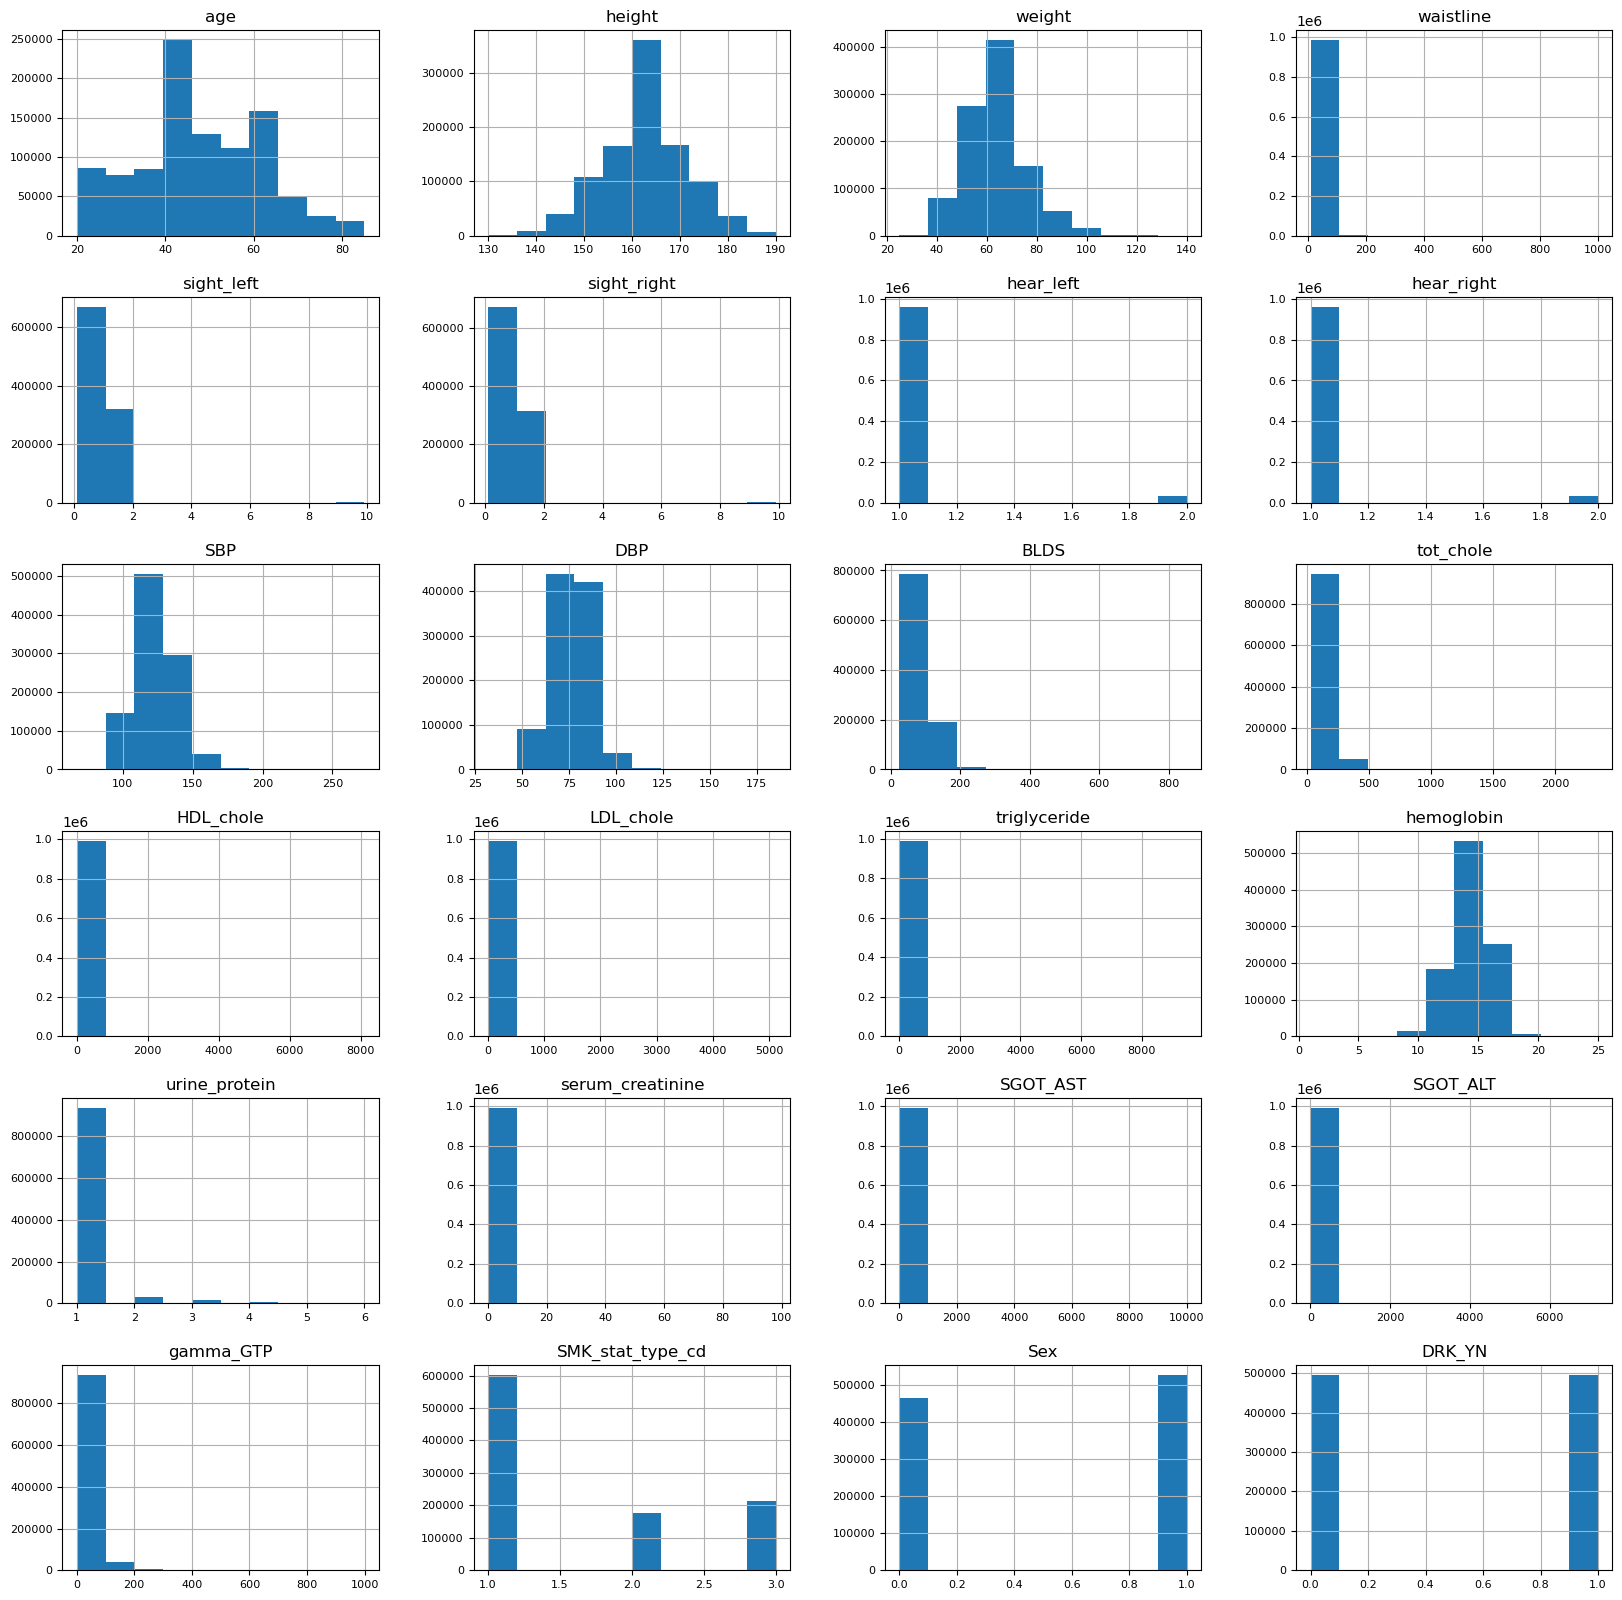

In [19]:
#visual check
df.hist(figsize=(20,20), layout=(6, 4), xlabelsize=8, ylabelsize=8)

In [20]:
#checking for missing values 
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis= 1)
missing.columns=["count", "%" ]
missing.sort_values(by=['count', '%'], ascending=False)

,count,%
age,0,0.0
height,0,0.0
weight,0,0.0
waistline,0,0.0
sight_left,0,0.0
sight_right,0,0.0
hear_left,0,0.0
hear_right,0,0.0
SBP,0,0.0
DBP,0,0.0


In [21]:
#Smoking state, 1(never), 2(used to smoke but quit), 3(still smoke)
df['SMK_stat_type_cd'].value_counts()

1.0    602441
3.0    213954
2.0    174951
Name: SMK_stat_type_cd, dtype: int64

In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,991346.0,47.614491,14.181339,20.0,35.0,45.0,60.0,85.0
height,991346.0,162.240625,9.282957,130.0,155.0,160.0,170.0,190.0
weight,991346.0,63.284050,12.514241,25.0,55.0,60.0,70.0,140.0
waistline,991346.0,81.233358,11.850323,8.0,74.1,81.0,87.8,999.0
sight_left,991346.0,0.980834,0.605949,0.1,0.7,1.0,1.2,9.9
sight_right,991346.0,0.978429,0.604774,0.1,0.7,1.0,1.2,9.9
hear_left,991346.0,1.031495,0.174650,1.0,1.0,1.0,1.0,2.0
hear_right,991346.0,1.030476,0.171892,1.0,1.0,1.0,1.0,2.0
SBP,991346.0,122.432498,14.543148,67.0,112.0,120.0,131.0,273.0
DBP,991346.0,76.052627,9.889365,32.0,70.0,76.0,82.0,185.0


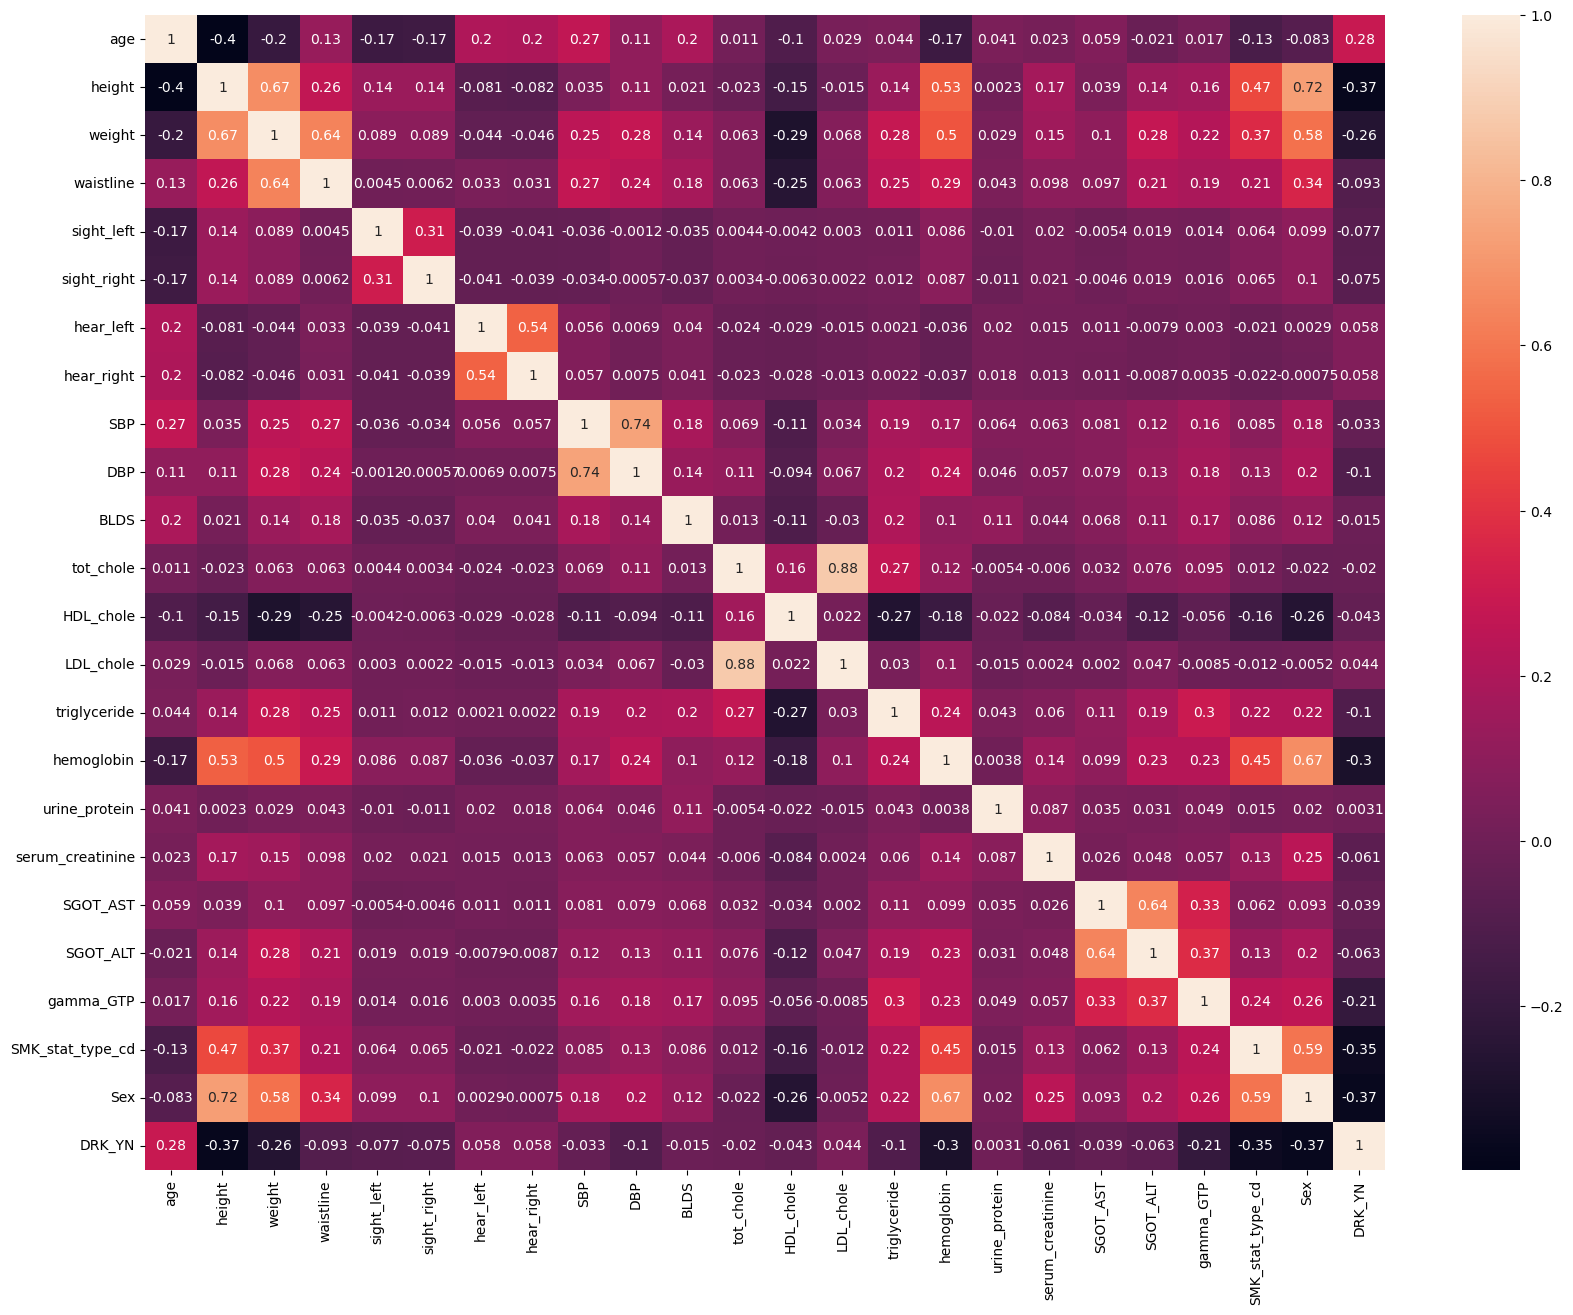

In [23]:
#seaborn heatmap of correlations in data
plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(),annot=True);

In [24]:
# Drinkers 
drinkers = df.loc[df['DRK_YN'] == 0]

In [25]:
drinkers.head()

,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,...,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,Sex,DRK_YN
0,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,80.0,...,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,1,0
5,50,165,55,75.0,1.2,1.5,1.0,1.0,142.0,92.0,...,232.0,13.8,3.0,0.8,29.0,40.0,37.0,3.0,1,0
7,35,175,65,84.2,1.2,1.0,1.0,1.0,132.0,80.0,...,101.0,14.4,1.0,0.8,18.0,18.0,35.0,3.0,1,0
8,55,170,75,84.0,1.2,0.9,1.0,1.0,145.0,85.0,...,100.0,15.1,1.0,0.8,32.0,23.0,26.0,1.0,1,0
9,40,175,75,82.0,1.5,1.5,1.0,1.0,132.0,105.0,...,83.0,13.9,1.0,0.9,21.0,38.0,16.0,2.0,1,0


In [26]:
#drinkers and active smokers
drinkers_csmokers = drinkers.loc[drinkers['SMK_stat_type_cd'] == 3.0]

In [27]:
drinkers_csmokers.head()

,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,...,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,Sex,DRK_YN
5,50,165,55,75.0,1.2,1.5,1.0,1.0,142.0,92.0,...,232.0,13.8,3.0,0.8,29.0,40.0,37.0,3.0,1,0
7,35,175,65,84.2,1.2,1.0,1.0,1.0,132.0,80.0,...,101.0,14.4,1.0,0.8,18.0,18.0,35.0,3.0,1,0
19,60,165,60,85.0,0.3,0.7,1.0,1.0,120.0,85.0,...,222.0,15.2,1.0,1.0,19.0,20.0,48.0,3.0,1,0
21,25,175,65,82.0,1.5,1.5,1.0,1.0,130.0,76.0,...,57.0,16.7,1.0,1.2,28.0,30.0,32.0,3.0,1,0
25,60,170,75,87.0,0.7,0.7,1.0,1.0,119.0,80.0,...,150.0,15.9,1.0,0.7,31.0,29.0,76.0,3.0,1,0


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'height'}>,
        <AxesSubplot:title={'center':'weight'}>,
        <AxesSubplot:title={'center':'waistline'}>],
       [<AxesSubplot:title={'center':'sight_left'}>,
        <AxesSubplot:title={'center':'sight_right'}>,
        <AxesSubplot:title={'center':'hear_left'}>,
        <AxesSubplot:title={'center':'hear_right'}>],
       [<AxesSubplot:title={'center':'SBP'}>,
        <AxesSubplot:title={'center':'DBP'}>,
        <AxesSubplot:title={'center':'BLDS'}>,
        <AxesSubplot:title={'center':'tot_chole'}>],
       [<AxesSubplot:title={'center':'HDL_chole'}>,
        <AxesSubplot:title={'center':'LDL_chole'}>,
        <AxesSubplot:title={'center':'triglyceride'}>,
        <AxesSubplot:title={'center':'hemoglobin'}>],
       [<AxesSubplot:title={'center':'urine_protein'}>,
        <AxesSubplot:title={'center':'serum_creatinine'}>,
        <AxesSubplot:title={'center':'SGOT_AST'}>,
        <AxesSubplo

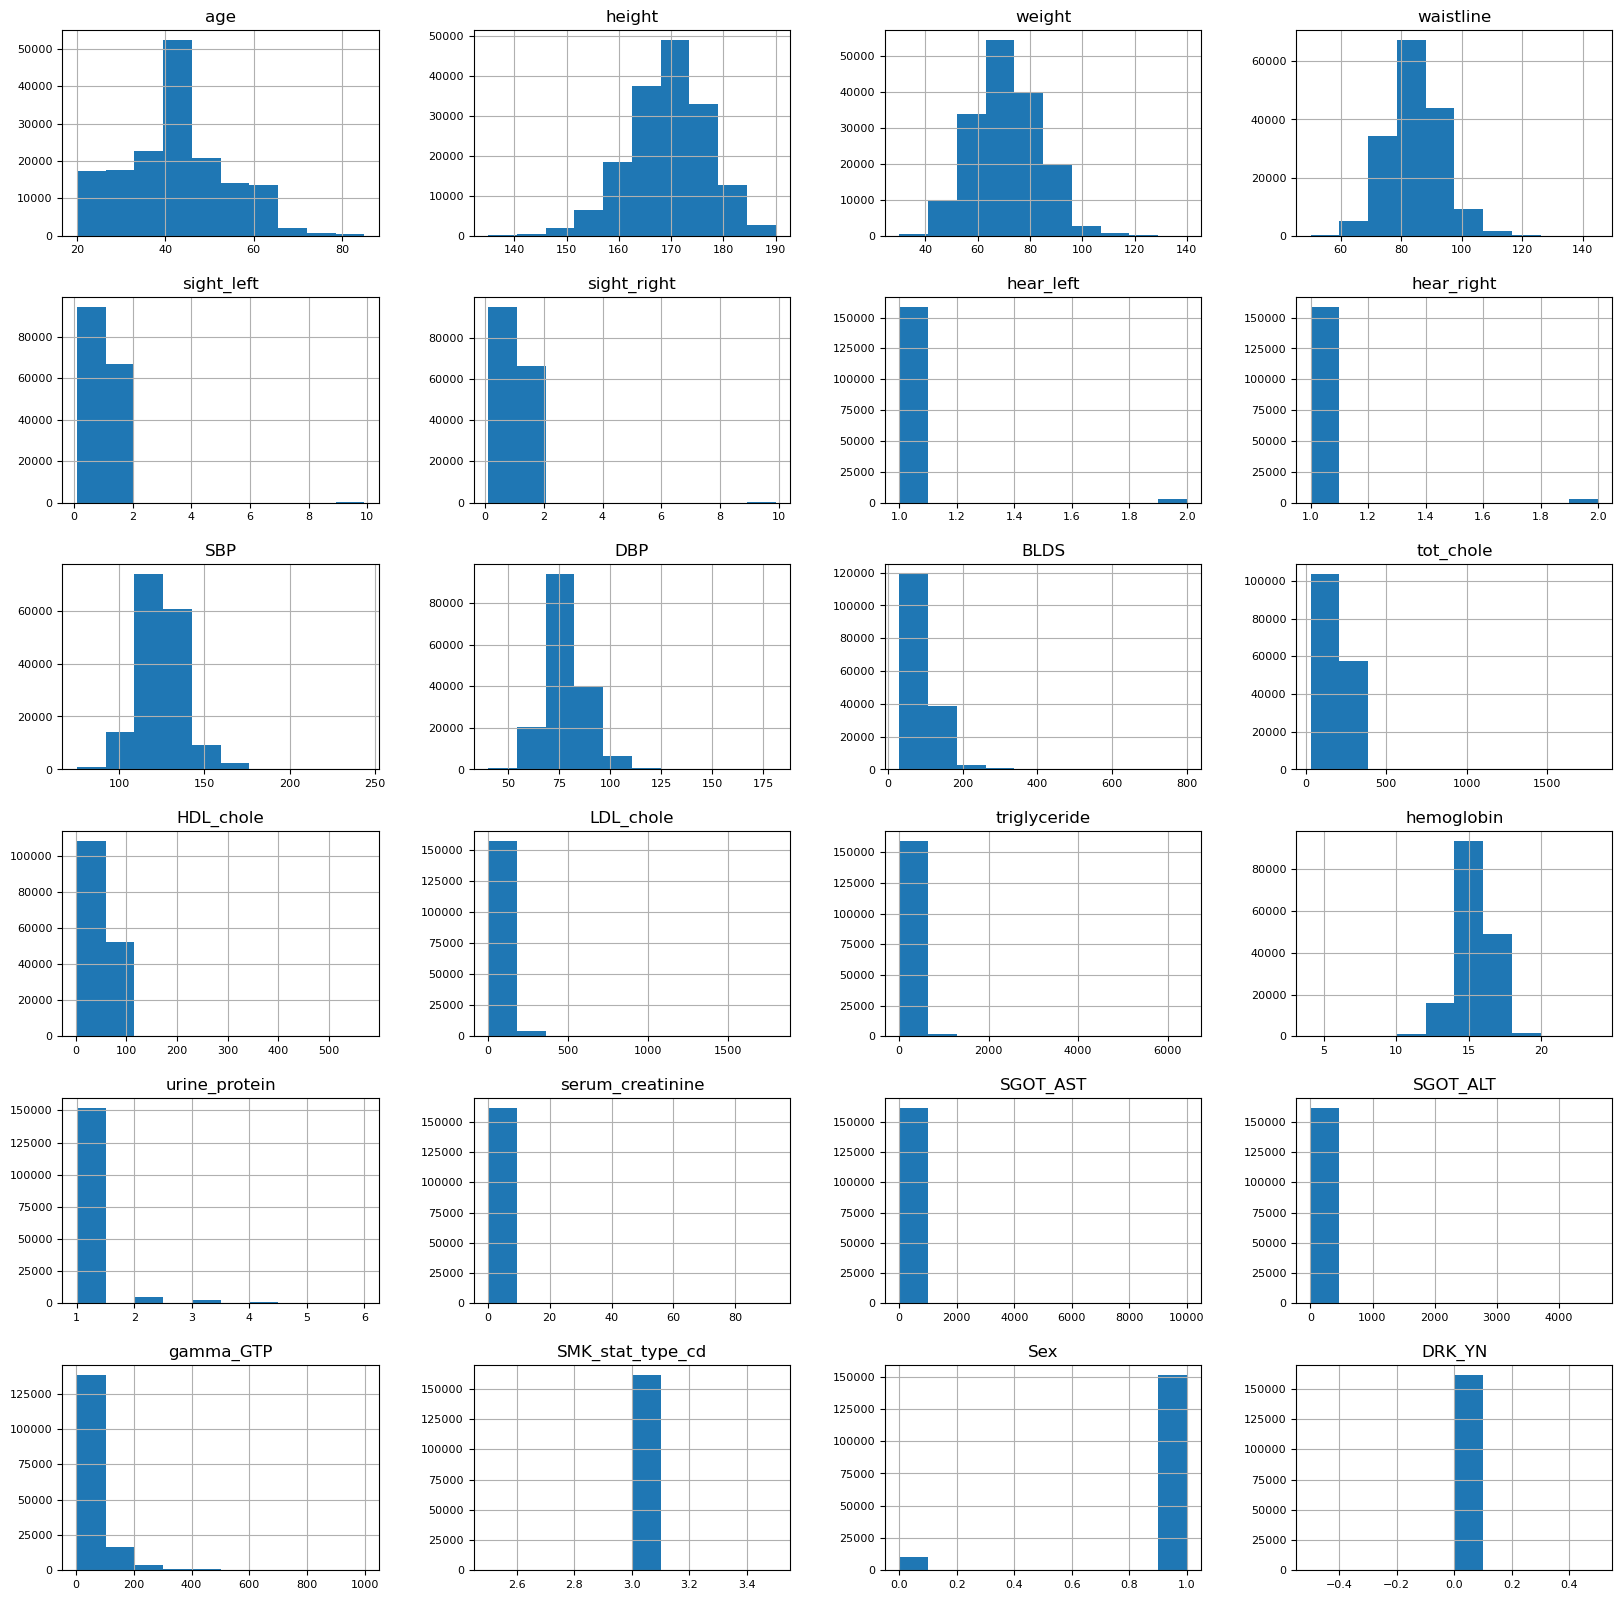

In [28]:
drinkers_csmokers.hist(figsize=(20,20), layout=(6, 4), xlabelsize=8, ylabelsize=8)

In [29]:
#drinkers and former smokers
drinkers_psmokers = drinkers.loc[drinkers['SMK_stat_type_cd'] == 2.0]

In [30]:
drinkers_psmokers.head()

,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,...,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,Sex,DRK_YN
9,40,175,75,82.0,1.5,1.5,1.0,1.0,132.0,105.0,...,83.0,13.9,1.0,0.9,21.0,38.0,16.0,2.0,1,0
23,40,165,75,92.0,1.0,1.5,1.0,1.0,110.0,70.0,...,125.0,16.1,1.0,1.0,29.0,31.0,33.0,2.0,1,0
33,45,170,80,92.9,1.0,1.0,1.0,1.0,111.0,83.0,...,262.0,14.6,1.0,0.9,20.0,19.0,28.0,2.0,1,0
35,55,170,60,75.0,0.8,0.8,1.0,1.0,133.0,84.0,...,110.0,11.4,1.0,0.8,32.0,19.0,15.0,2.0,1,0
36,40,175,65,79.3,1.0,0.7,1.0,1.0,120.0,80.0,...,88.0,15.4,1.0,0.9,21.0,18.0,45.0,2.0,1,0


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'height'}>,
        <AxesSubplot:title={'center':'weight'}>,
        <AxesSubplot:title={'center':'waistline'}>],
       [<AxesSubplot:title={'center':'sight_left'}>,
        <AxesSubplot:title={'center':'sight_right'}>,
        <AxesSubplot:title={'center':'hear_left'}>,
        <AxesSubplot:title={'center':'hear_right'}>],
       [<AxesSubplot:title={'center':'SBP'}>,
        <AxesSubplot:title={'center':'DBP'}>,
        <AxesSubplot:title={'center':'BLDS'}>,
        <AxesSubplot:title={'center':'tot_chole'}>],
       [<AxesSubplot:title={'center':'HDL_chole'}>,
        <AxesSubplot:title={'center':'LDL_chole'}>,
        <AxesSubplot:title={'center':'triglyceride'}>,
        <AxesSubplot:title={'center':'hemoglobin'}>],
       [<AxesSubplot:title={'center':'urine_protein'}>,
        <AxesSubplot:title={'center':'serum_creatinine'}>,
        <AxesSubplot:title={'center':'SGOT_AST'}>,
        <AxesSubplo

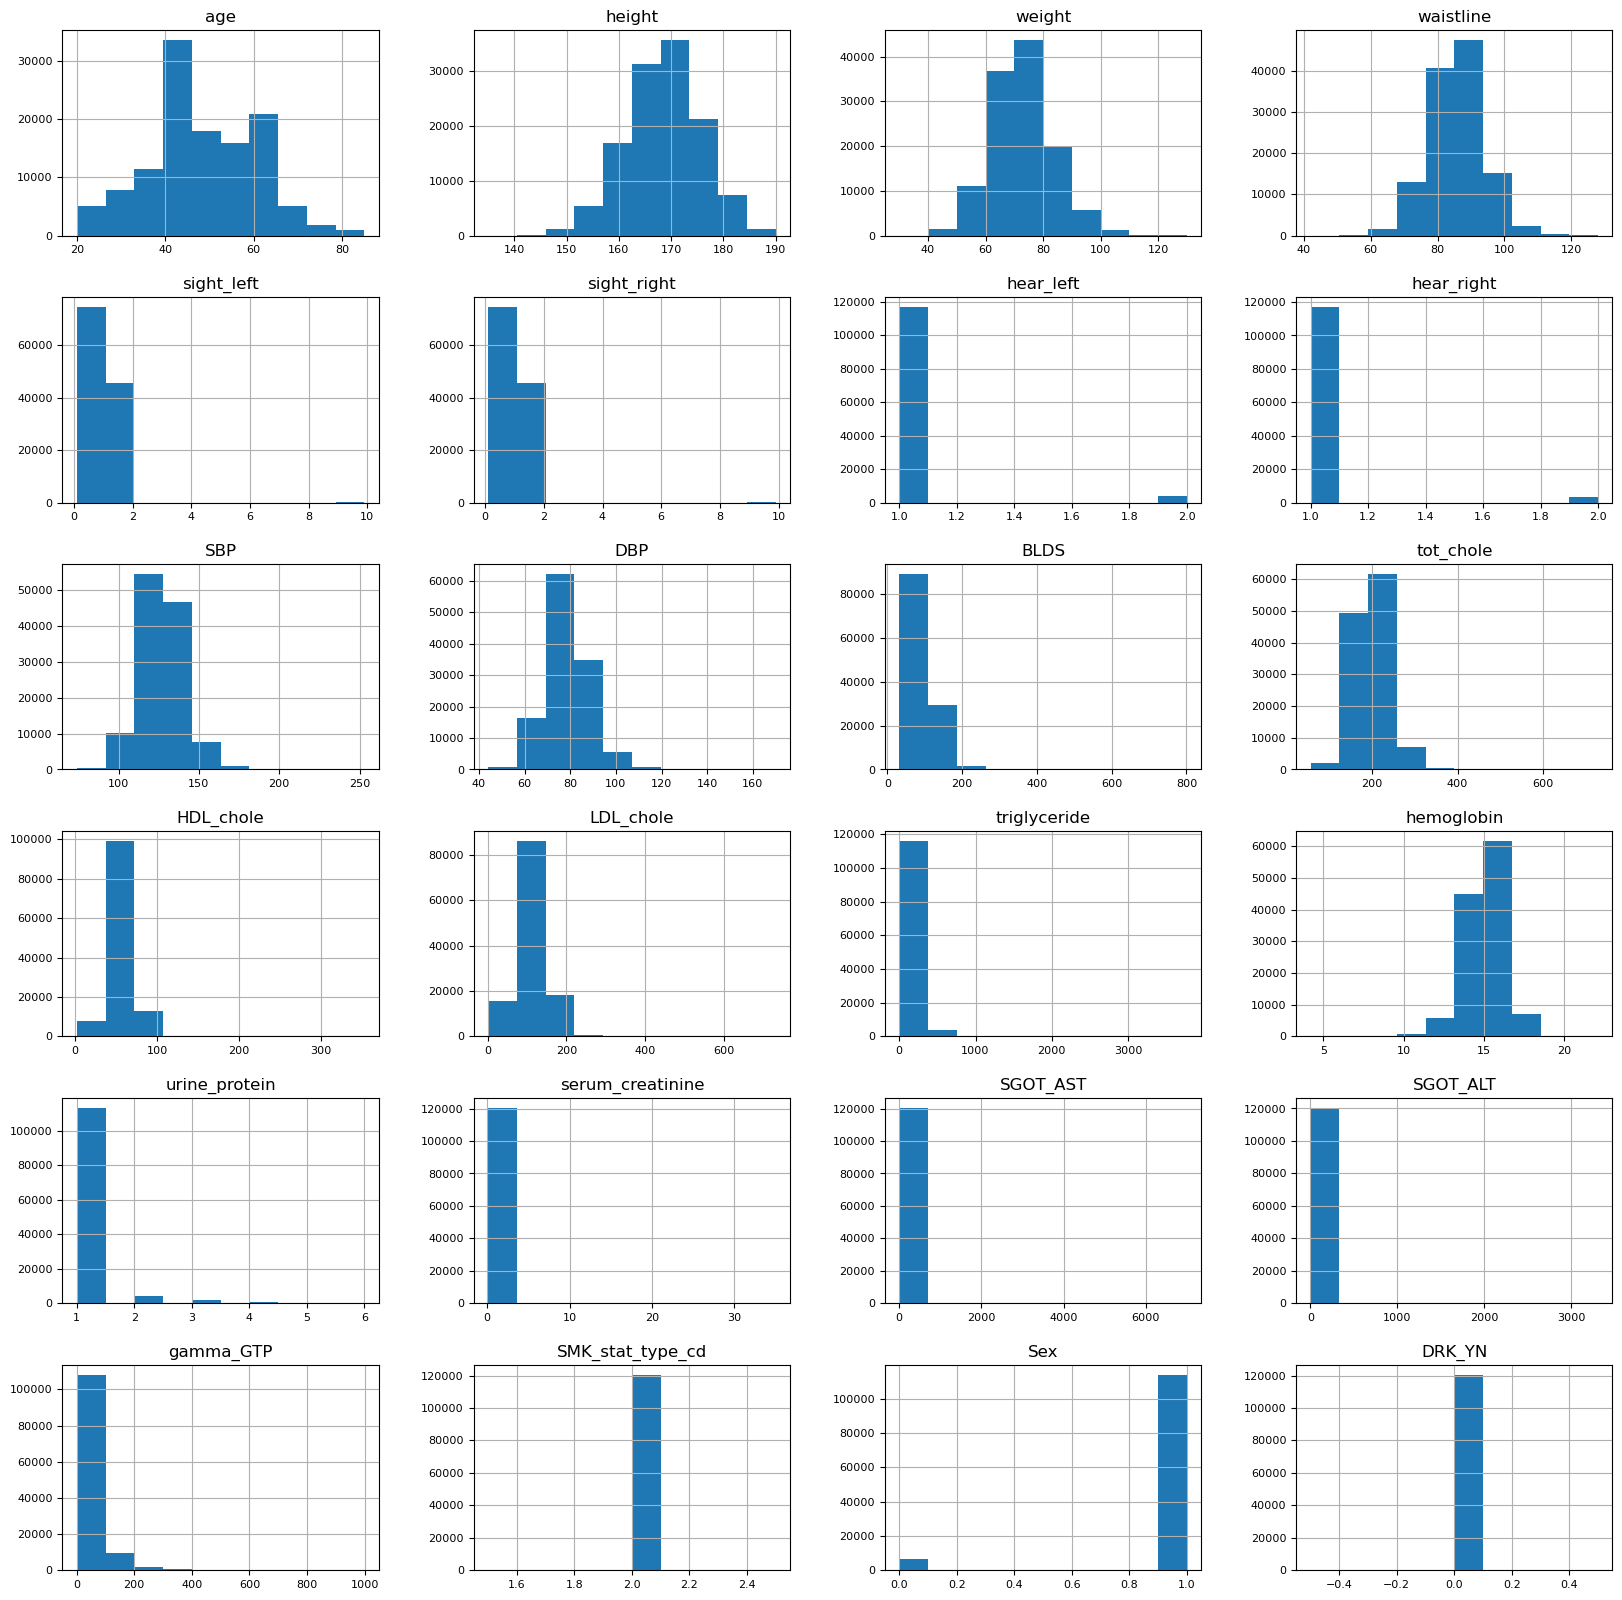

In [31]:
drinkers_psmokers.hist(figsize=(20,20), layout=(6, 4), xlabelsize=8, ylabelsize=8)

In [32]:
#drinkers but NOT smokers 
drinkers_nsmokers = drinkers.loc[drinkers['SMK_stat_type_cd'] == 1.0]

In [33]:
drinkers_nsmokers.head()

,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,...,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,Sex,DRK_YN
0,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,80.0,...,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,1,0
8,55,170,75,84.0,1.2,0.9,1.0,1.0,145.0,85.0,...,100.0,15.1,1.0,0.8,32.0,23.0,26.0,1.0,1,0
13,30,175,75,88.0,1.2,1.2,1.0,1.0,118.0,72.0,...,77.0,15.7,1.0,0.9,13.0,16.0,19.0,1.0,1,0
16,25,160,65,73.0,1.2,0.9,1.0,1.0,126.0,78.0,...,60.0,12.3,1.0,0.5,12.0,7.0,9.0,1.0,0,0
17,25,170,65,78.0,1.2,1.2,1.0,1.0,119.0,67.0,...,54.0,14.8,1.0,0.9,33.0,17.0,13.0,1.0,1,0


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'height'}>,
        <AxesSubplot:title={'center':'weight'}>,
        <AxesSubplot:title={'center':'waistline'}>],
       [<AxesSubplot:title={'center':'sight_left'}>,
        <AxesSubplot:title={'center':'sight_right'}>,
        <AxesSubplot:title={'center':'hear_left'}>,
        <AxesSubplot:title={'center':'hear_right'}>],
       [<AxesSubplot:title={'center':'SBP'}>,
        <AxesSubplot:title={'center':'DBP'}>,
        <AxesSubplot:title={'center':'BLDS'}>,
        <AxesSubplot:title={'center':'tot_chole'}>],
       [<AxesSubplot:title={'center':'HDL_chole'}>,
        <AxesSubplot:title={'center':'LDL_chole'}>,
        <AxesSubplot:title={'center':'triglyceride'}>,
        <AxesSubplot:title={'center':'hemoglobin'}>],
       [<AxesSubplot:title={'center':'urine_protein'}>,
        <AxesSubplot:title={'center':'serum_creatinine'}>,
        <AxesSubplot:title={'center':'SGOT_AST'}>,
        <AxesSubplo

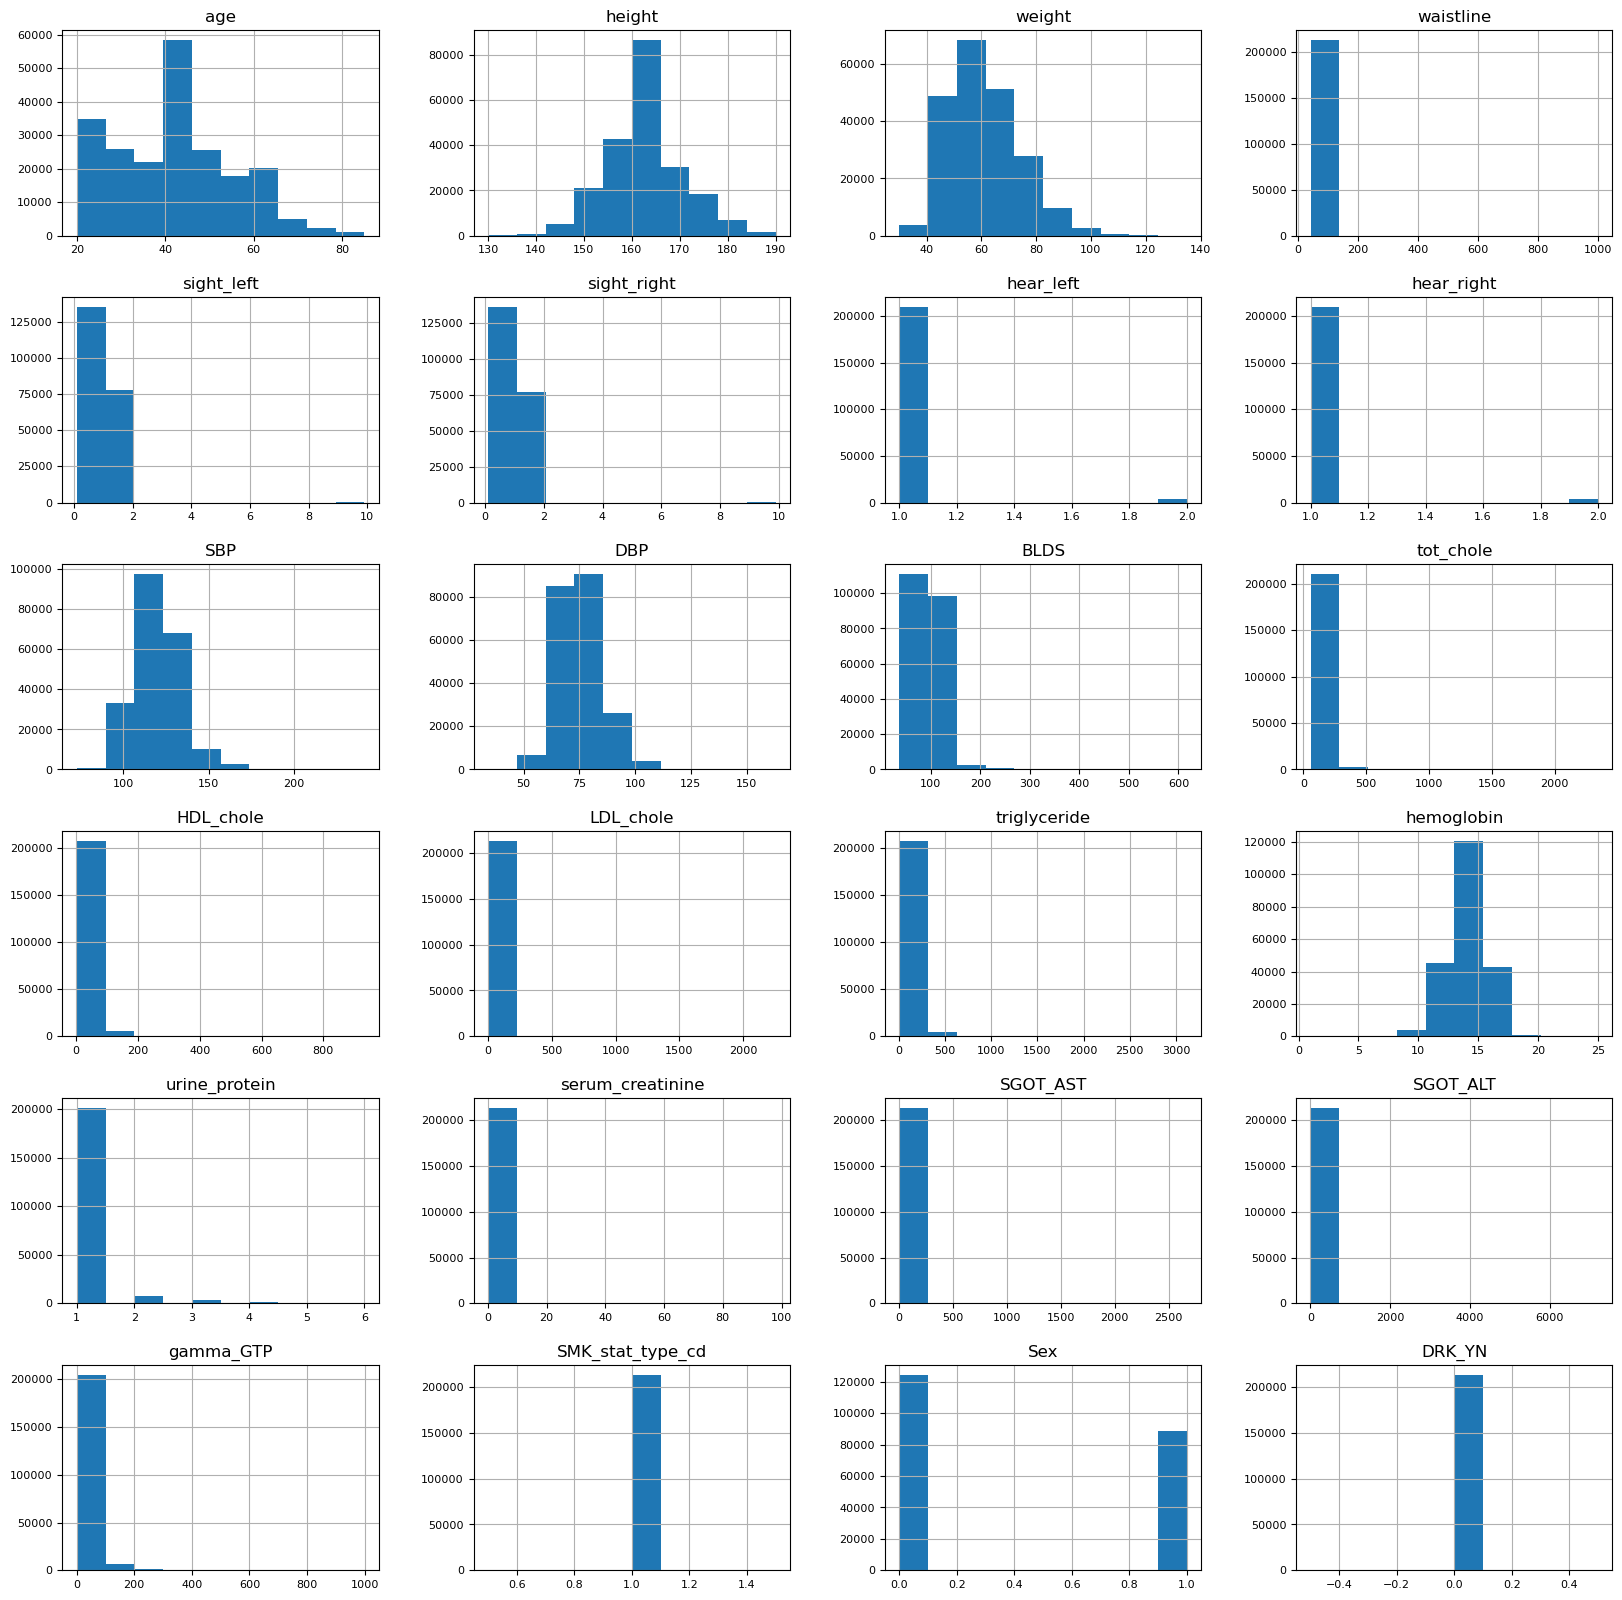

In [34]:
drinkers_nsmokers.hist(figsize=(20,20), layout=(6, 4), xlabelsize=8, ylabelsize=8)

In [35]:
non_drinkers = df.loc[df['DRK_YN'] == 1]

In [36]:
non_drinkers.head()

,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,...,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,Sex,DRK_YN
1,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,82.0,...,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,1,1
2,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,70.0,...,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,1,1
3,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,87.0,...,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,1,1
4,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,82.0,...,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,1,1
6,45,150,55,69.0,0.5,0.4,1.0,1.0,101.0,58.0,...,75.0,12.3,1.0,0.8,19.0,12.0,12.0,1.0,0,1


In [37]:
#Smokers but not drinkers 
nondrinkers_csmokers = non_drinkers.loc[non_drinkers['SMK_stat_type_cd'] == 3.0]

In [38]:
nondrinkers_csmokers.head()

,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,...,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,Sex,DRK_YN
1,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,82.0,...,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,1,1
32,40,165,60,71.0,0.7,1.0,1.0,1.0,128.0,70.0,...,47.0,16.5,1.0,1.1,16.0,18.0,18.0,3.0,1,1
92,40,170,75,86.8,1.2,1.2,1.0,1.0,130.0,80.0,...,95.0,16.0,1.0,0.7,26.0,27.0,47.0,3.0,1,1
98,70,160,55,75.0,0.8,0.8,1.0,1.0,139.0,66.0,...,192.0,15.2,1.0,0.9,30.0,29.0,52.0,3.0,1,1
99,45,150,45,77.0,0.5,1.0,1.0,1.0,139.0,86.0,...,106.0,13.4,1.0,0.4,35.0,52.0,131.0,3.0,0,1


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'height'}>,
        <AxesSubplot:title={'center':'weight'}>,
        <AxesSubplot:title={'center':'waistline'}>],
       [<AxesSubplot:title={'center':'sight_left'}>,
        <AxesSubplot:title={'center':'sight_right'}>,
        <AxesSubplot:title={'center':'hear_left'}>,
        <AxesSubplot:title={'center':'hear_right'}>],
       [<AxesSubplot:title={'center':'SBP'}>,
        <AxesSubplot:title={'center':'DBP'}>,
        <AxesSubplot:title={'center':'BLDS'}>,
        <AxesSubplot:title={'center':'tot_chole'}>],
       [<AxesSubplot:title={'center':'HDL_chole'}>,
        <AxesSubplot:title={'center':'LDL_chole'}>,
        <AxesSubplot:title={'center':'triglyceride'}>,
        <AxesSubplot:title={'center':'hemoglobin'}>],
       [<AxesSubplot:title={'center':'urine_protein'}>,
        <AxesSubplot:title={'center':'serum_creatinine'}>,
        <AxesSubplot:title={'center':'SGOT_AST'}>,
        <AxesSubplo

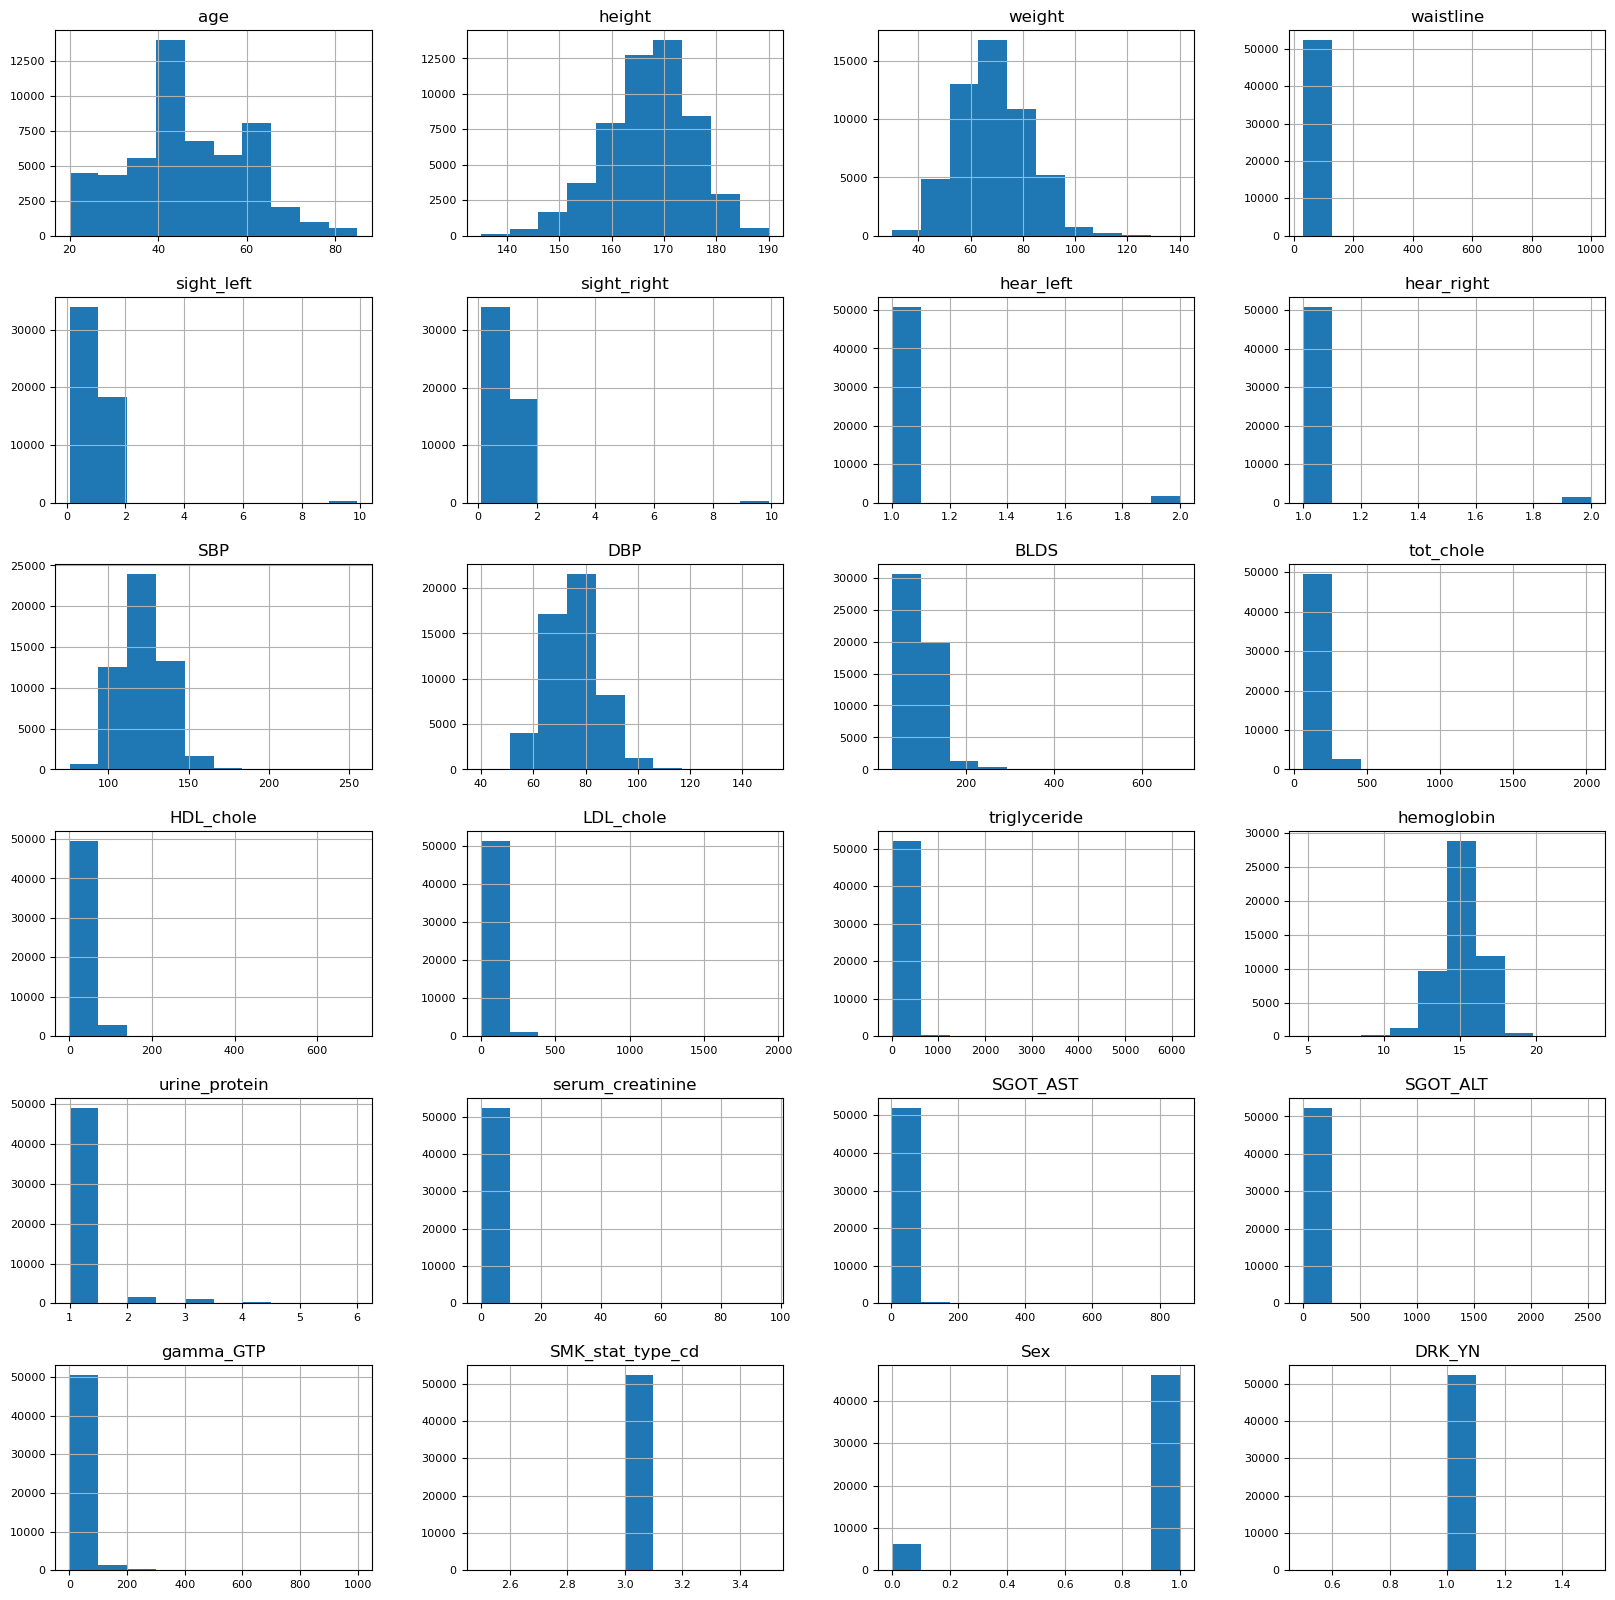

In [39]:
nondrinkers_csmokers.hist(figsize=(20,20), layout=(6, 4), xlabelsize=8, ylabelsize=8)

In [40]:
#Non drinkers but past smokers 
nondrinkers_psmokers = non_drinkers.loc[non_drinkers['SMK_stat_type_cd'] == 2.0]

In [41]:
nondrinkers_psmokers.head()

,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,...,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,Sex,DRK_YN
11,65,155,75,98.0,1.2,9.9,1.0,1.0,109.0,69.0,...,137.0,16.5,1.0,1.3,48.0,51.0,42.0,2.0,1,1
31,60,165,65,84.0,0.5,0.9,1.0,1.0,115.0,70.0,...,69.0,15.2,1.0,1.1,22.0,25.0,28.0,2.0,1,1
41,65,160,50,75.0,0.6,0.7,1.0,1.0,142.0,85.0,...,99.0,15.4,1.0,0.9,19.0,15.0,32.0,2.0,1,1
69,60,160,60,87.0,1.5,1.2,1.0,2.0,115.0,74.0,...,76.0,14.1,1.0,0.9,28.0,37.0,20.0,2.0,1,1
75,60,165,65,84.0,1.2,1.5,1.0,1.0,130.0,80.0,...,137.0,13.2,1.0,0.8,21.0,30.0,21.0,2.0,1,1


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'height'}>,
        <AxesSubplot:title={'center':'weight'}>,
        <AxesSubplot:title={'center':'waistline'}>],
       [<AxesSubplot:title={'center':'sight_left'}>,
        <AxesSubplot:title={'center':'sight_right'}>,
        <AxesSubplot:title={'center':'hear_left'}>,
        <AxesSubplot:title={'center':'hear_right'}>],
       [<AxesSubplot:title={'center':'SBP'}>,
        <AxesSubplot:title={'center':'DBP'}>,
        <AxesSubplot:title={'center':'BLDS'}>,
        <AxesSubplot:title={'center':'tot_chole'}>],
       [<AxesSubplot:title={'center':'HDL_chole'}>,
        <AxesSubplot:title={'center':'LDL_chole'}>,
        <AxesSubplot:title={'center':'triglyceride'}>,
        <AxesSubplot:title={'center':'hemoglobin'}>],
       [<AxesSubplot:title={'center':'urine_protein'}>,
        <AxesSubplot:title={'center':'serum_creatinine'}>,
        <AxesSubplot:title={'center':'SGOT_AST'}>,
        <AxesSubplo

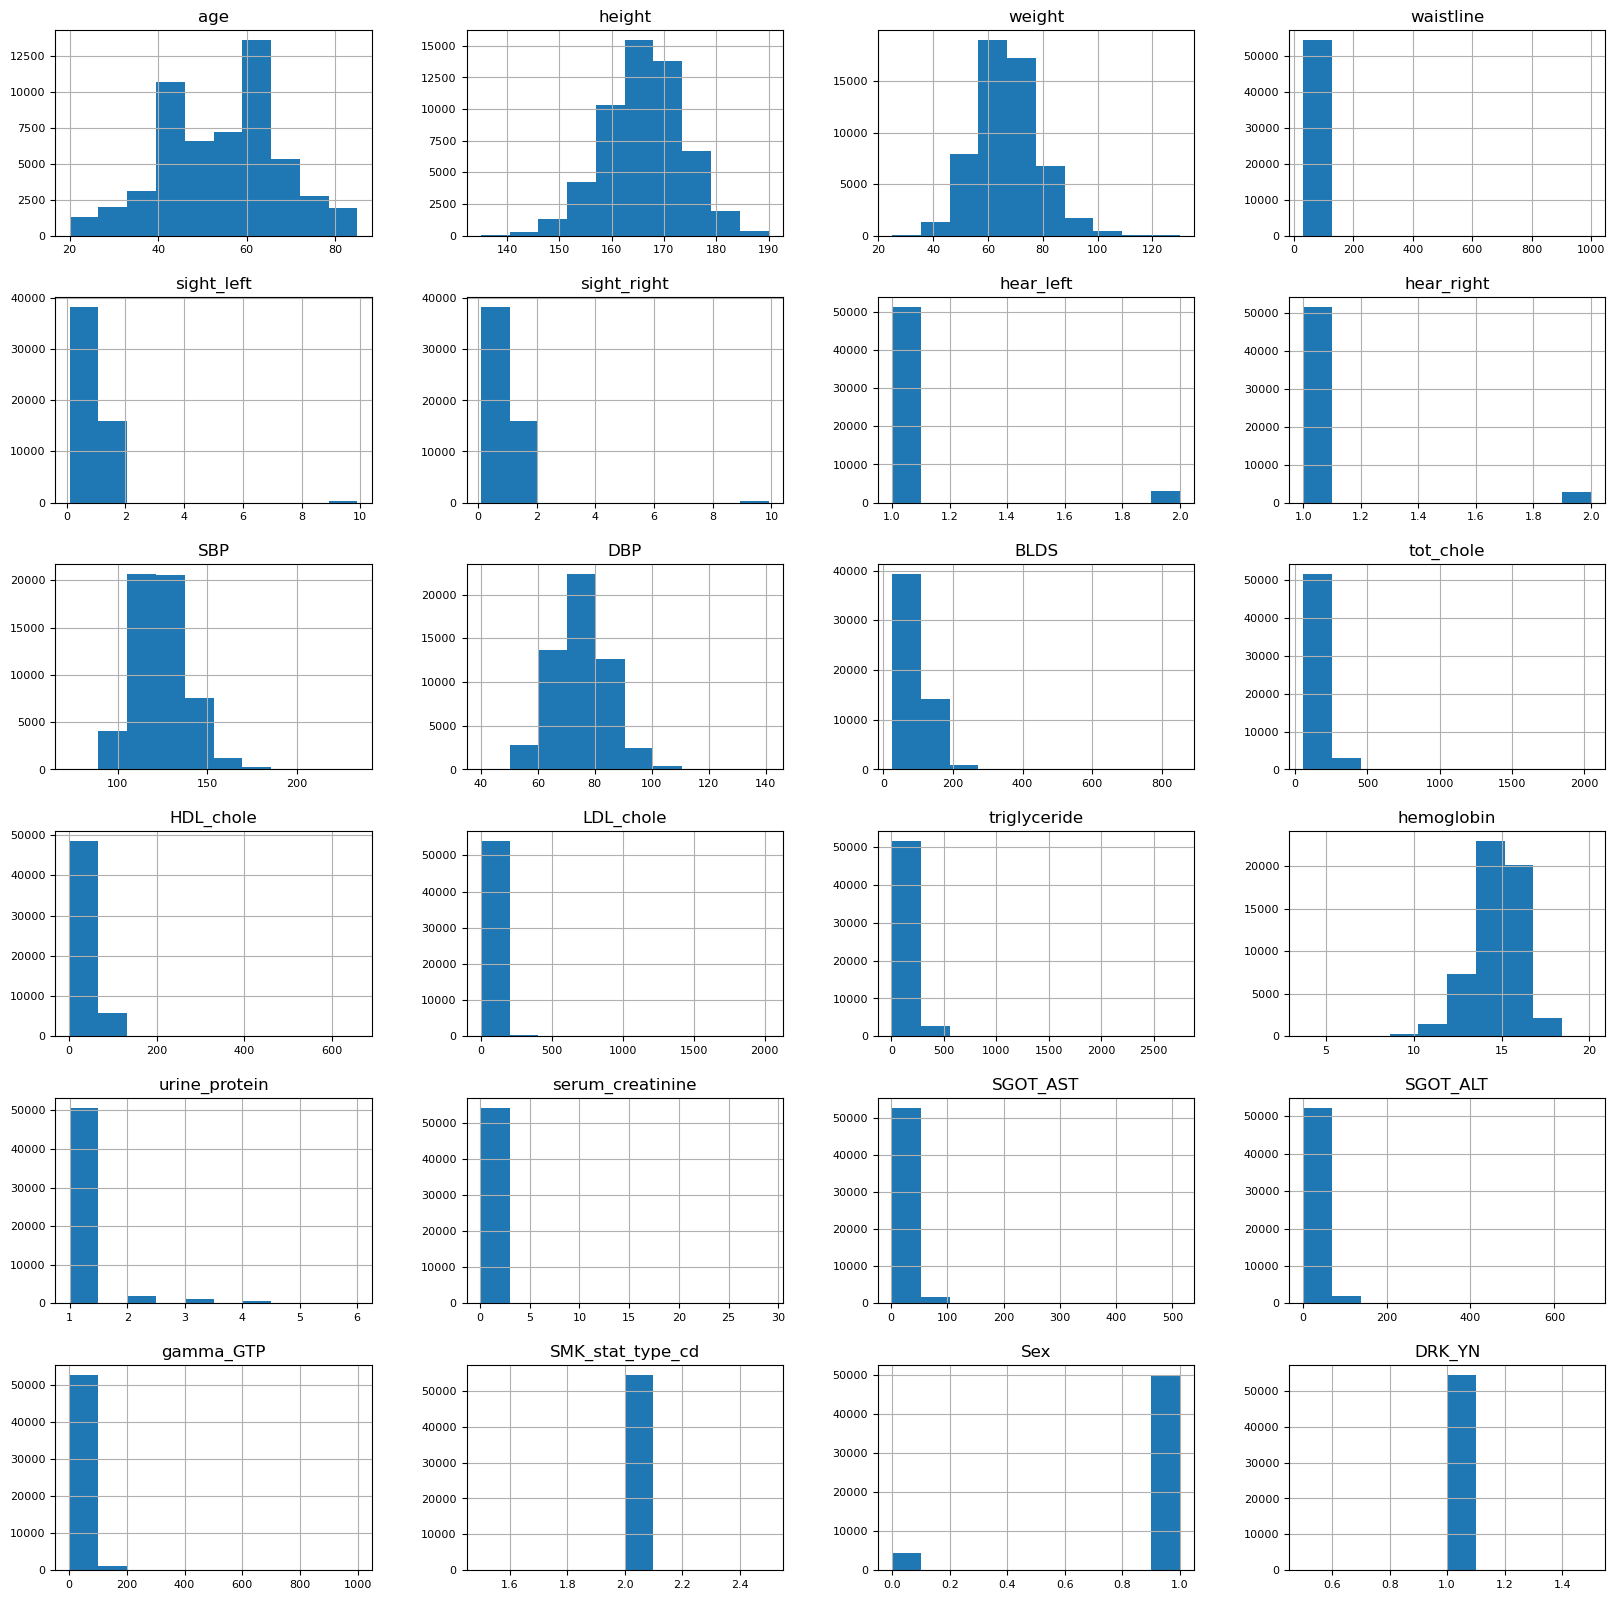

In [42]:
nondrinkers_psmokers.hist(figsize=(20,20), layout=(6, 4), xlabelsize=8, ylabelsize=8)

In [43]:
nondrinkers_nsmokers = non_drinkers.loc[non_drinkers['SMK_stat_type_cd'] == 1.0]

In [44]:
nondrinkers_nsmokers.head()

,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,...,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,Sex,DRK_YN
2,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,70.0,...,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,1,1
3,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,87.0,...,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,1,1
4,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,82.0,...,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,1,1
6,45,150,55,69.0,0.5,0.4,1.0,1.0,101.0,58.0,...,75.0,12.3,1.0,0.8,19.0,12.0,12.0,1.0,0,1
10,45,155,55,79.2,1.0,1.0,1.0,1.0,118.0,70.0,...,55.0,12.9,1.0,0.8,19.0,14.0,19.0,1.0,1,1


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'height'}>,
        <AxesSubplot:title={'center':'weight'}>,
        <AxesSubplot:title={'center':'waistline'}>],
       [<AxesSubplot:title={'center':'sight_left'}>,
        <AxesSubplot:title={'center':'sight_right'}>,
        <AxesSubplot:title={'center':'hear_left'}>,
        <AxesSubplot:title={'center':'hear_right'}>],
       [<AxesSubplot:title={'center':'SBP'}>,
        <AxesSubplot:title={'center':'DBP'}>,
        <AxesSubplot:title={'center':'BLDS'}>,
        <AxesSubplot:title={'center':'tot_chole'}>],
       [<AxesSubplot:title={'center':'HDL_chole'}>,
        <AxesSubplot:title={'center':'LDL_chole'}>,
        <AxesSubplot:title={'center':'triglyceride'}>,
        <AxesSubplot:title={'center':'hemoglobin'}>],
       [<AxesSubplot:title={'center':'urine_protein'}>,
        <AxesSubplot:title={'center':'serum_creatinine'}>,
        <AxesSubplot:title={'center':'SGOT_AST'}>,
        <AxesSubplo

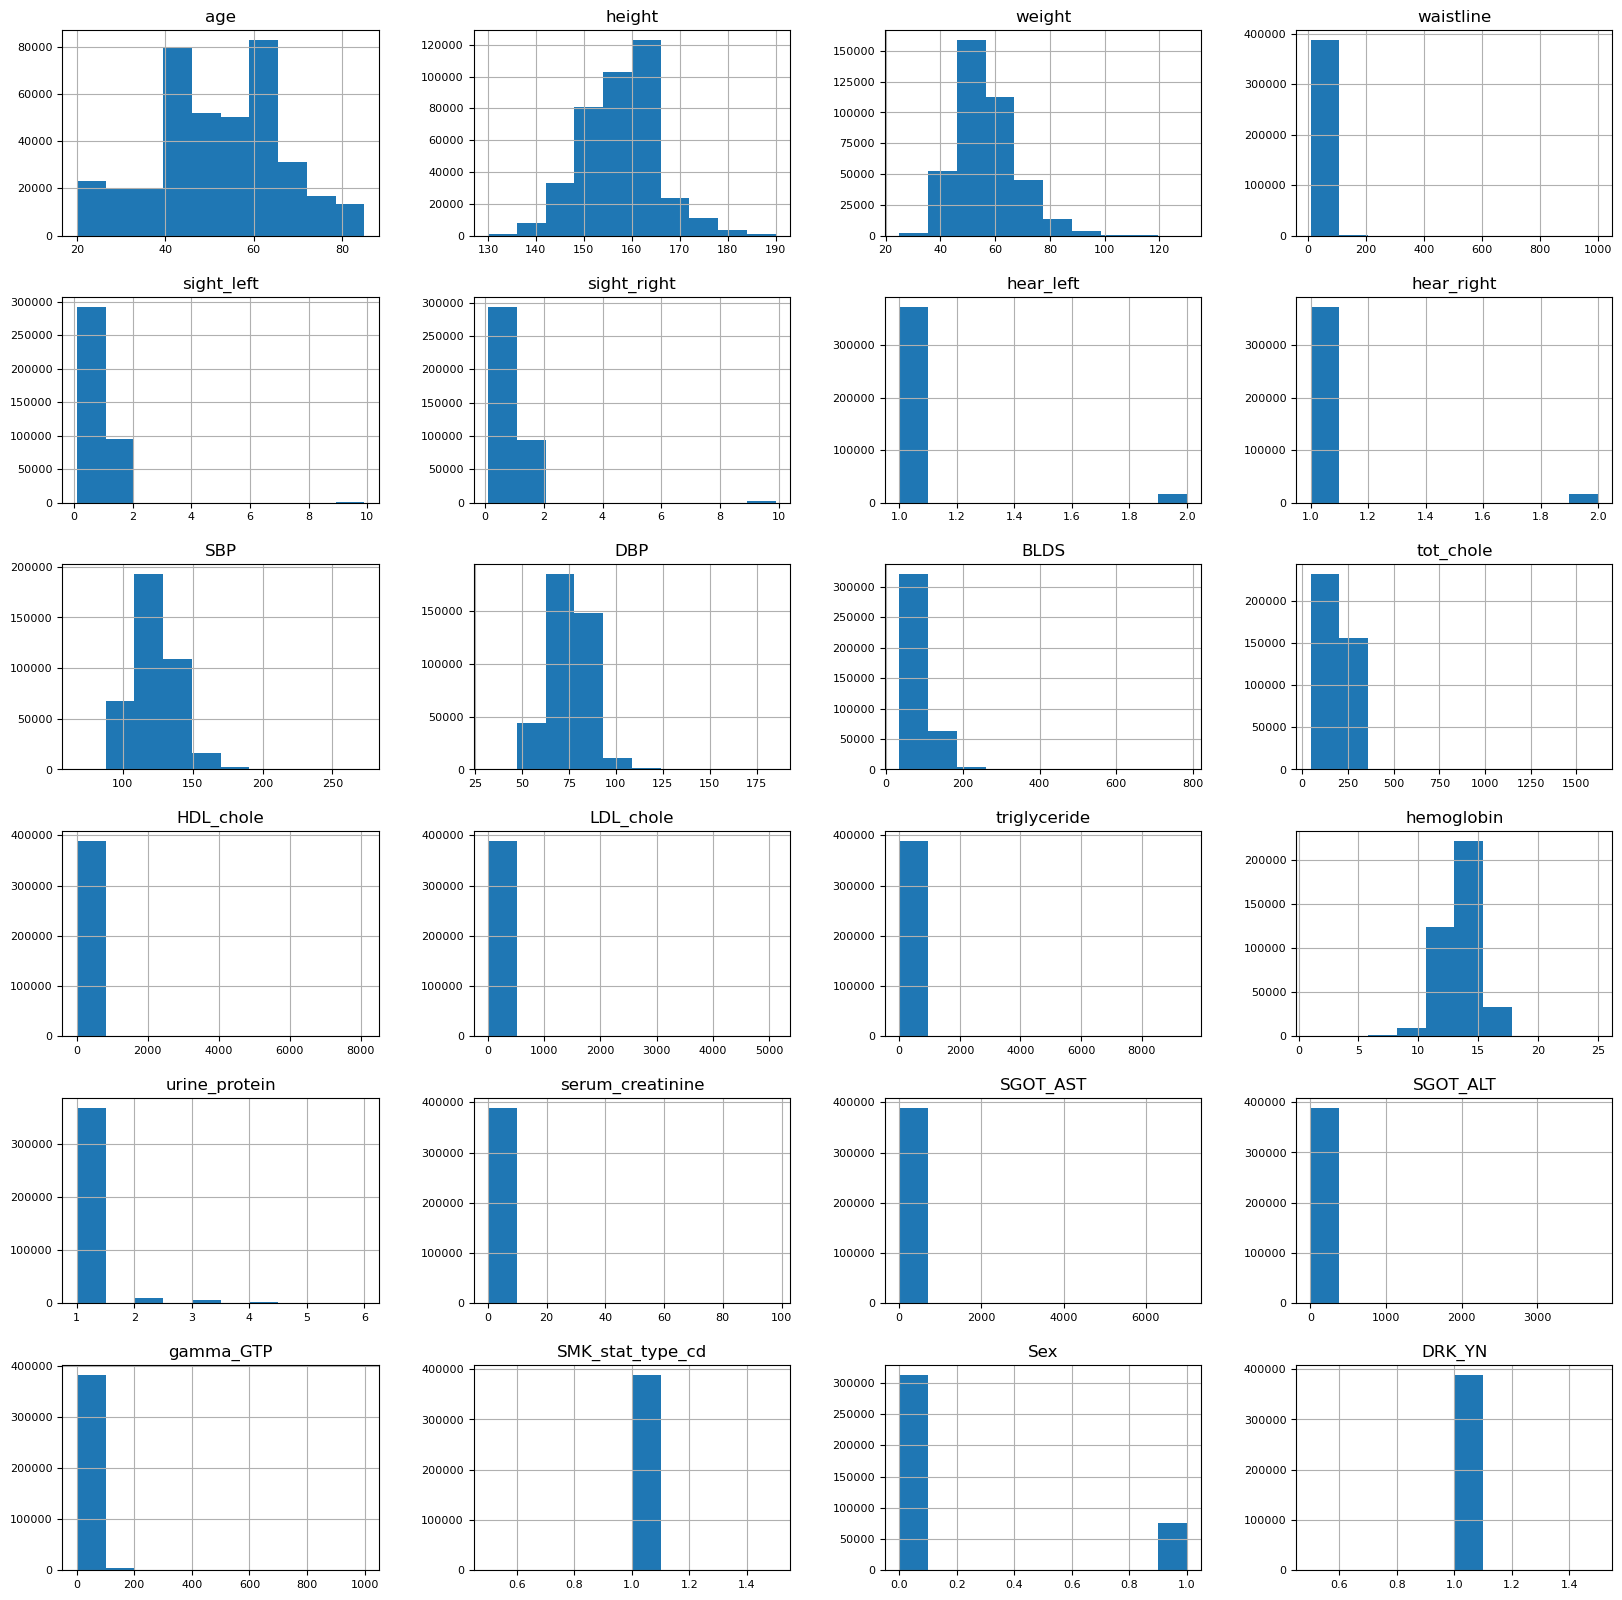

In [45]:
nondrinkers_nsmokers.hist(figsize=(20,20), layout=(6, 4), xlabelsize=8, ylabelsize=8)

In [46]:
print(drinkers_csmokers.shape)
print(drinkers_psmokers.shape)
print(drinkers_nsmokers.shape)
print(nondrinkers_csmokers.shape)
print(nondrinkers_psmokers.shape)
print(nondrinkers_nsmokers.shape)

(161577, 24)
(120480, 24)
(213431, 24)
(52377, 24)
(54471, 24)
(389010, 24)


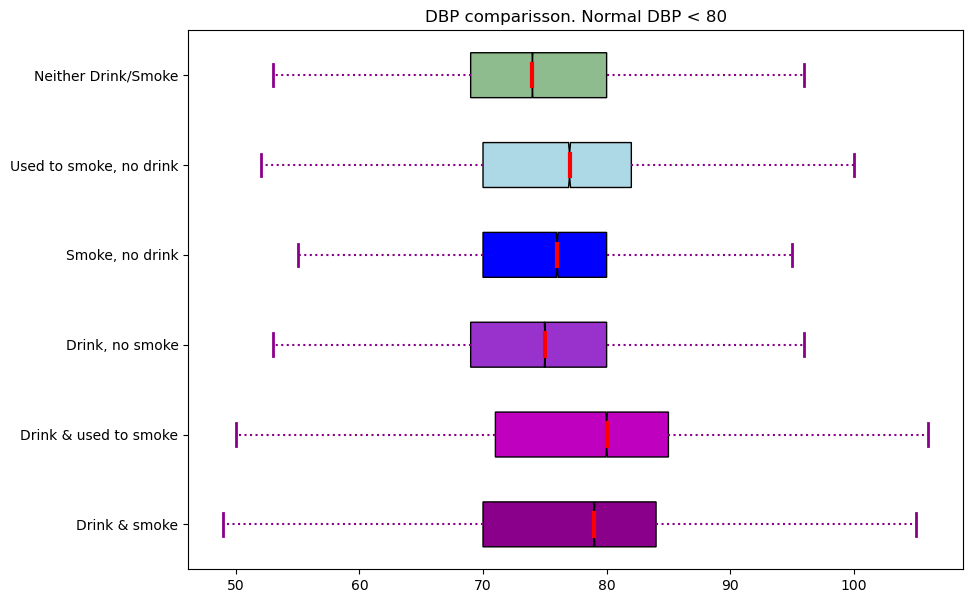

In [47]:
# Creating dataset
np.random.seed(10)
data_1 = drinkers_csmokers['DBP']
data_2 = drinkers_psmokers['DBP']
data_3 = drinkers_nsmokers['DBP']
data_4 = nondrinkers_csmokers['DBP']
data_5 = nondrinkers_psmokers['DBP']
data_6 = nondrinkers_nsmokers['DBP']
data = [data_1, data_2, data_3, data_4, data_5, data_6]

fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)

# Creating axes instance
bp = ax.boxplot(data, patch_artist = True,
				notch ='True', vert = 0, showfliers=False)

colors = ['darkmagenta', 'm',
		'darkorchid', 'b', 'lightblue', 'darkseagreen']

for patch, color in zip(bp['boxes'], colors):
	patch.set_facecolor(color)

# changing color and linewidth of
# whiskers
for whisker in bp['whiskers']:
	whisker.set(color ='#8B008B',
				linewidth = 1.5,
				linestyle =":")

# changing color and linewidth of
# caps
for cap in bp['caps']:
	cap.set(color ='#8B008B',
			linewidth = 2)

# changing color and linewidth of
# medians
for median in bp['medians']:
	median.set(color ='red',
			linewidth = 3)

# changing style of fliers
for flier in bp['fliers']:
	flier.set(marker ='D',
			color ='#e7298a',
			alpha = 0.5)
	
# x-axis labels
ax.set_yticklabels(['Drink & smoke', 'Drink & used to smoke',
					'Drink, no smoke', 'Smoke, no drink', 'Used to smoke, no drink', 'Neither Drink/Smoke'])

# Adding title
plt.title("DBP comparisson. Normal DBP < 80")

# Removing top axes and right axes
# ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
	
# show plot
plt.show()


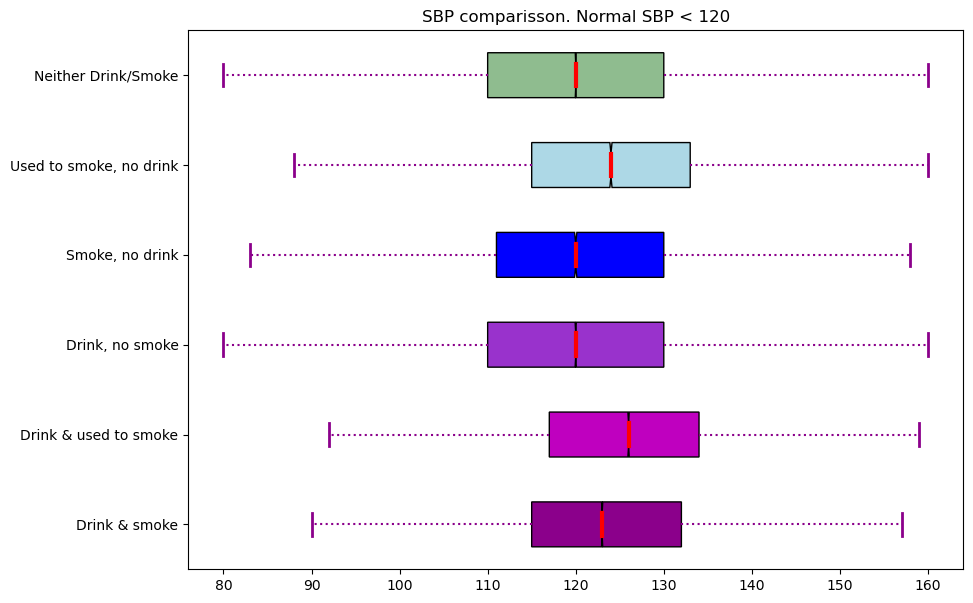

In [48]:
# Creating dataset
np.random.seed(10)
data_1 = drinkers_csmokers['SBP']
data_2 = drinkers_psmokers['SBP']
data_3 = drinkers_nsmokers['SBP']
data_4 = nondrinkers_csmokers['SBP']
data_5 = nondrinkers_psmokers['SBP']
data_6 = nondrinkers_nsmokers['SBP']
data = [data_1, data_2, data_3, data_4, data_5, data_6]

fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)

# Creating axes instance
bp = ax.boxplot(data, patch_artist = True,
				notch ='True', vert = 0, showfliers=False)

colors = ['darkmagenta', 'm',
		'darkorchid', 'b', 'lightblue', 'darkseagreen']

for patch, color in zip(bp['boxes'], colors):
	patch.set_facecolor(color)

# changing color and linewidth of
# whiskers
for whisker in bp['whiskers']:
	whisker.set(color ='#8B008B',
				linewidth = 1.5,
				linestyle =":")

# changing color and linewidth of
# caps
for cap in bp['caps']:
	cap.set(color ='#8B008B',
			linewidth = 2)

# changing color and linewidth of
# medians
for median in bp['medians']:
	median.set(color ='red',
			linewidth = 3)

# changing style of fliers
for flier in bp['fliers']:
	flier.set(marker ='D',
			color ='#e7298a',
			alpha = 0.5)
	
# x-axis labels
ax.set_yticklabels(['Drink & smoke', 'Drink & used to smoke',
					'Drink, no smoke', 'Smoke, no drink', 'Used to smoke, no drink', 'Neither Drink/Smoke'])

# Adding title
plt.title("SBP comparisson. Normal SBP < 120")

# Removing top axes and right axes
# ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
	
# show plot
plt.show()

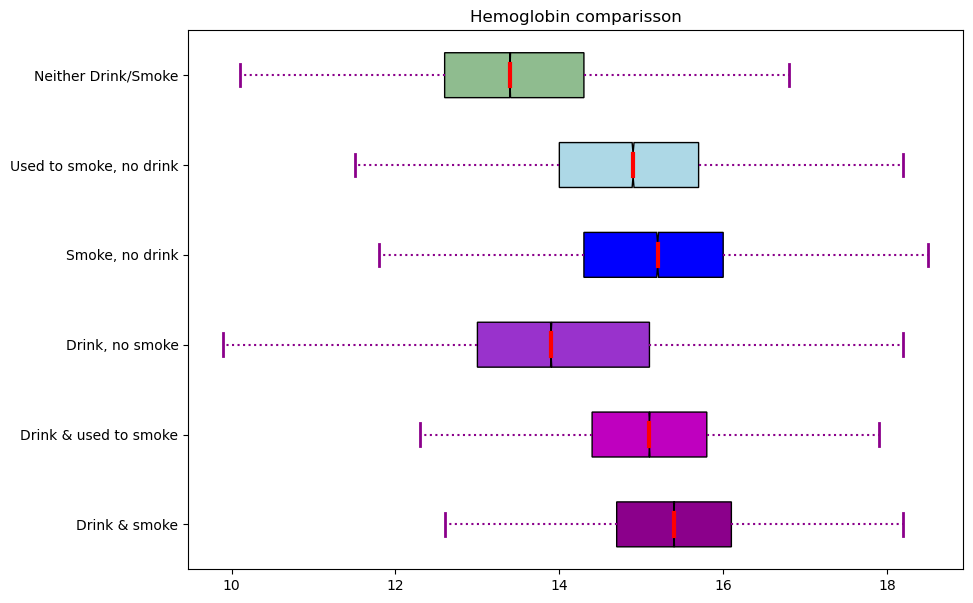

In [49]:
# Creating dataset
np.random.seed(10)
data_1 = drinkers_csmokers['hemoglobin']
data_2 = drinkers_psmokers['hemoglobin']
data_3 = drinkers_nsmokers['hemoglobin']
data_4 = nondrinkers_csmokers['hemoglobin']
data_5 = nondrinkers_psmokers['hemoglobin']
data_6 = nondrinkers_nsmokers['hemoglobin']
data = [data_1, data_2, data_3, data_4, data_5, data_6]

fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)

# Creating axes instance
bp = ax.boxplot(data, patch_artist = True,
				notch ='True', vert = 0, showfliers=False)

colors = ['darkmagenta', 'm',
		'darkorchid', 'b', 'lightblue', 'darkseagreen']

for patch, color in zip(bp['boxes'], colors):
	patch.set_facecolor(color)

# changing color and linewidth of
# whiskers
for whisker in bp['whiskers']:
	whisker.set(color ='#8B008B',
				linewidth = 1.5,
				linestyle =":")

# changing color and linewidth of
# caps
for cap in bp['caps']:
	cap.set(color ='#8B008B',
			linewidth = 2)

# changing color and linewidth of
# medians
for median in bp['medians']:
	median.set(color ='red',
			linewidth = 3)

# changing style of fliers
for flier in bp['fliers']:
	flier.set(marker ='D',
			color ='#e7298a',
			alpha = 0.5)
	
# x-axis labels
ax.set_yticklabels(['Drink & smoke', 'Drink & used to smoke',
					'Drink, no smoke', 'Smoke, no drink', 'Used to smoke, no drink', 'Neither Drink/Smoke'])

# Adding title
plt.title("Hemoglobin comparisson")

# Removing top axes and right axes
# ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
	
# show plot
plt.show()

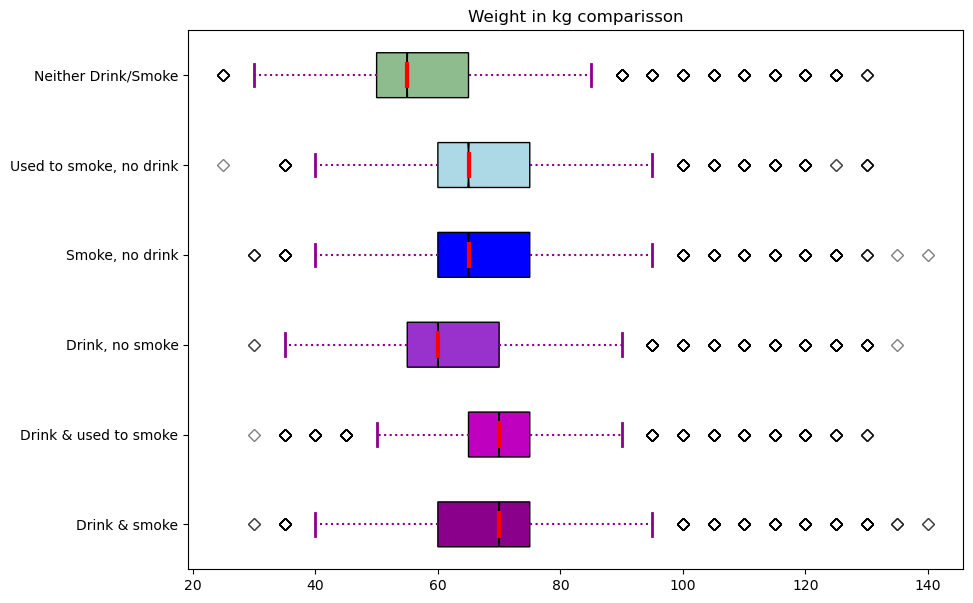

In [50]:
# Creating dataset
np.random.seed(10)
data_1 = drinkers_csmokers['weight']
data_2 = drinkers_psmokers['weight']
data_3 = drinkers_nsmokers['weight']
data_4 = nondrinkers_csmokers['weight']
data_5 = nondrinkers_psmokers['weight']
data_6 = nondrinkers_nsmokers['weight']
data = [data_1, data_2, data_3, data_4, data_5, data_6]

fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)

# Creating axes instance
bp = ax.boxplot(data, patch_artist = True,
				notch ='True', vert = 0)

colors = ['darkmagenta', 'm',
		'darkorchid', 'b', 'lightblue', 'darkseagreen']

for patch, color in zip(bp['boxes'], colors):
	patch.set_facecolor(color)

# changing color and linewidth of
# whiskers
for whisker in bp['whiskers']:
	whisker.set(color ='#8B008B',
				linewidth = 1.5,
				linestyle =":")

# changing color and linewidth of
# caps
for cap in bp['caps']:
	cap.set(color ='#8B008B',
			linewidth = 2)

# changing color and linewidth of
# medians
for median in bp['medians']:
	median.set(color ='red',
			linewidth = 3)

# changing style of fliers
for flier in bp['fliers']:
	flier.set(marker ='D',
			color ='#e7298a',
			alpha = 0.5)
	
# x-axis labels
ax.set_yticklabels(['Drink & smoke', 'Drink & used to smoke',
					'Drink, no smoke', 'Smoke, no drink', 'Used to smoke, no drink', 'Neither Drink/Smoke'])

# Adding title
plt.title("Weight in kg comparisson")

# Removing top axes and right axes
# ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
	
# show plot
plt.show()

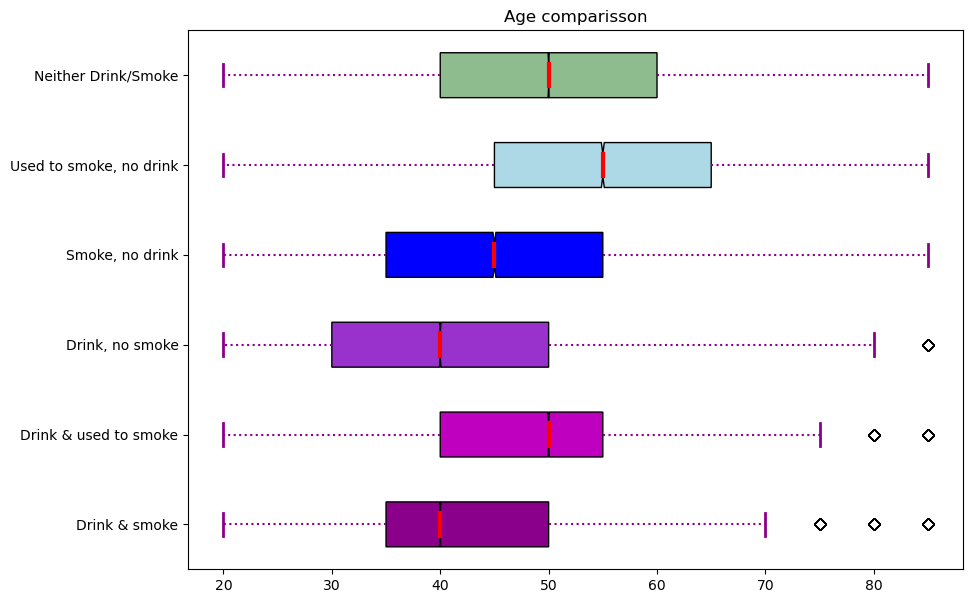

In [51]:
# Creating dataset
np.random.seed(10)
data_1 = drinkers_csmokers['age']
data_2 = drinkers_psmokers['age']
data_3 = drinkers_nsmokers['age']
data_4 = nondrinkers_csmokers['age']
data_5 = nondrinkers_psmokers['age']
data_6 = nondrinkers_nsmokers['age']
data = [data_1, data_2, data_3, data_4, data_5, data_6]

fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)

# Creating axes instance
bp = ax.boxplot(data, patch_artist = True,
				notch ='True', vert = 0)

colors = ['darkmagenta', 'm',
		'darkorchid', 'b', 'lightblue', 'darkseagreen']

for patch, color in zip(bp['boxes'], colors):
	patch.set_facecolor(color)

# changing color and linewidth of
# whiskers
for whisker in bp['whiskers']:
	whisker.set(color ='#8B008B',
				linewidth = 1.5,
				linestyle =":")

# changing color and linewidth of
# caps
for cap in bp['caps']:
	cap.set(color ='#8B008B',
			linewidth = 2)

# changing color and linewidth of
# medians
for median in bp['medians']:
	median.set(color ='red',
			linewidth = 3)

# changing style of fliers
for flier in bp['fliers']:
	flier.set(marker ='D',
			color ='#e7298a',
			alpha = 0.5)
	
# x-axis labels
ax.set_yticklabels(['Drink & smoke', 'Drink & used to smoke',
					'Drink, no smoke', 'Smoke, no drink', 'Used to smoke, no drink', 'Neither Drink/Smoke'])

# Adding title
plt.title("Age comparisson")

# Removing top axes and right axes
# ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
	
# show plot
plt.show()

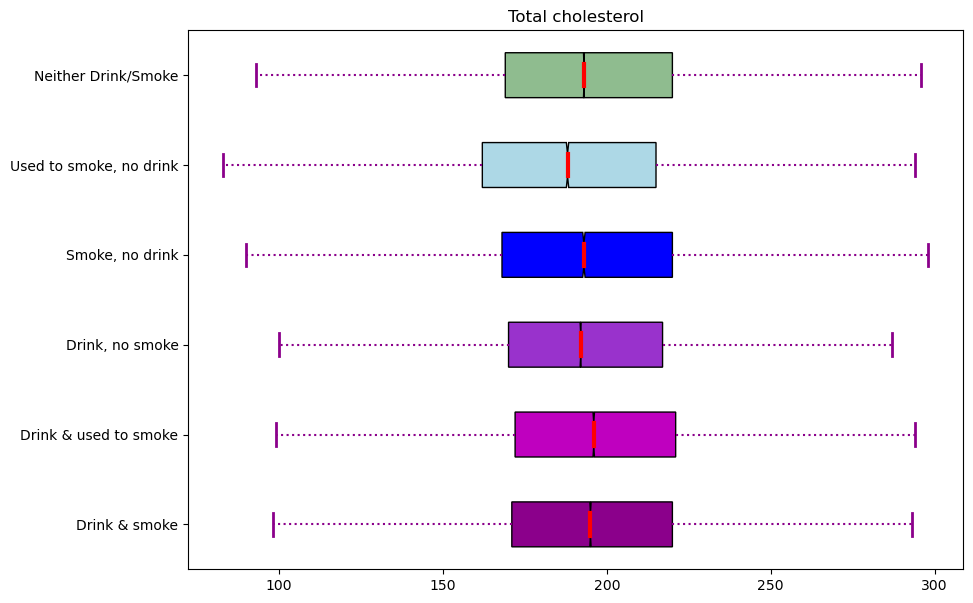

In [52]:
# Creating dataset
np.random.seed(10)
data_1 = drinkers_csmokers['tot_chole']
data_2 = drinkers_psmokers['tot_chole']
data_3 = drinkers_nsmokers['tot_chole']
data_4 = nondrinkers_csmokers['tot_chole']
data_5 = nondrinkers_psmokers['tot_chole']
data_6 = nondrinkers_nsmokers['tot_chole']
data = [data_1, data_2, data_3, data_4, data_5, data_6]

fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)

# Creating axes instance
bp = ax.boxplot(data, patch_artist = True,
				notch ='True', vert = 0, showfliers=False)

colors = ['darkmagenta', 'm',
		'darkorchid', 'b', 'lightblue', 'darkseagreen']

for patch, color in zip(bp['boxes'], colors):
	patch.set_facecolor(color)

# changing color and linewidth of
# whiskers
for whisker in bp['whiskers']:
	whisker.set(color ='#8B008B',
				linewidth = 1.5,
				linestyle =":")

# changing color and linewidth of
# caps
for cap in bp['caps']:
	cap.set(color ='#8B008B',
			linewidth = 2)

# changing color and linewidth of
# medians
for median in bp['medians']:
	median.set(color ='red',
			linewidth = 3)

# changing style of fliers
for flier in bp['fliers']:
	flier.set(marker ='D',
			color ='#e7298a',
			alpha = 0.5)
	
# x-axis labels
ax.set_yticklabels(['Drink & smoke', 'Drink & used to smoke',
					'Drink, no smoke', 'Smoke, no drink', 'Used to smoke, no drink', 'Neither Drink/Smoke'])

# Adding title
plt.title("Total cholesterol")

# Removing top axes and right axes
# ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
	
# show plot
plt.show()

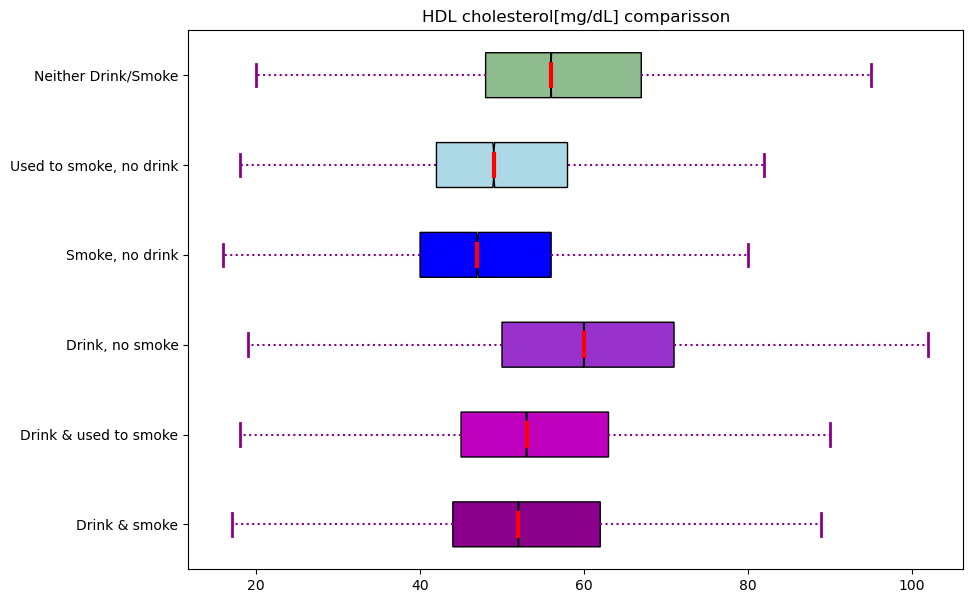

In [53]:
# Creating dataset
np.random.seed(10)
data_1 = drinkers_csmokers['HDL_chole']
data_2 = drinkers_psmokers['HDL_chole']
data_3 = drinkers_nsmokers['HDL_chole']
data_4 = nondrinkers_csmokers['HDL_chole']
data_5 = nondrinkers_psmokers['HDL_chole']
data_6 = nondrinkers_nsmokers['HDL_chole']
data = [data_1, data_2, data_3, data_4, data_5, data_6]

fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)

# Creating axes instance
bp = ax.boxplot(data, patch_artist = True,
				notch ='True', vert = 0, showfliers=False)

colors = ['darkmagenta', 'm',
		'darkorchid', 'b', 'lightblue', 'darkseagreen']

for patch, color in zip(bp['boxes'], colors):
	patch.set_facecolor(color)

# changing color and linewidth of
# whiskers
for whisker in bp['whiskers']:
	whisker.set(color ='#8B008B',
				linewidth = 1.5,
				linestyle =":")

# changing color and linewidth of
# caps
for cap in bp['caps']:
	cap.set(color ='#8B008B',
			linewidth = 2)

# changing color and linewidth of
# medians
for median in bp['medians']:
	median.set(color ='red',
			linewidth = 3)

# changing style of fliers
for flier in bp['fliers']:
	flier.set(marker ='D',
			color ='#e7298a',
			alpha = 0.5)
	
# x-axis labels
ax.set_yticklabels(['Drink & smoke', 'Drink & used to smoke',
					'Drink, no smoke', 'Smoke, no drink', 'Used to smoke, no drink', 'Neither Drink/Smoke'])

# Adding title
plt.title("HDL cholesterol[mg/dL] comparisson")

# Removing top axes and right axes
# ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
	
# show plot
plt.show()

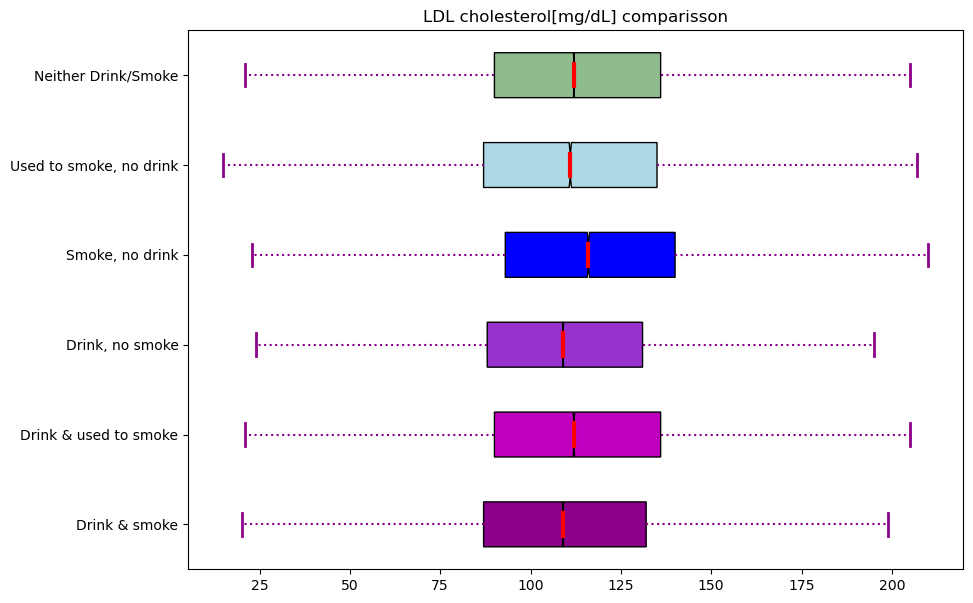

In [54]:
# Creating dataset
np.random.seed(10)
data_1 = drinkers_csmokers['LDL_chole']
data_2 = drinkers_psmokers['LDL_chole']
data_3 = drinkers_nsmokers['LDL_chole']
data_4 = nondrinkers_csmokers['LDL_chole']
data_5 = nondrinkers_psmokers['LDL_chole']
data_6 = nondrinkers_nsmokers['LDL_chole']
data = [data_1, data_2, data_3, data_4, data_5, data_6]

fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)

# Creating axes instance
bp = ax.boxplot(data, patch_artist = True,
				notch ='True', vert = 0, showfliers=False)

colors = ['darkmagenta', 'm',
		'darkorchid', 'b', 'lightblue', 'darkseagreen']

for patch, color in zip(bp['boxes'], colors):
	patch.set_facecolor(color)

# changing color and linewidth of
# whiskers
for whisker in bp['whiskers']:
	whisker.set(color ='#8B008B',
				linewidth = 1.5,
				linestyle =":")

# changing color and linewidth of
# caps
for cap in bp['caps']:
	cap.set(color ='#8B008B',
			linewidth = 2)

# changing color and linewidth of
# medians
for median in bp['medians']:
	median.set(color ='red',
			linewidth = 3)

# changing style of fliers
for flier in bp['fliers']:
	flier.set(marker ='D',
			color ='#e7298a',
			alpha = 0.5)
	
# x-axis labels
ax.set_yticklabels(['Drink & smoke', 'Drink & used to smoke',
					'Drink, no smoke', 'Smoke, no drink', 'Used to smoke, no drink', 'Neither Drink/Smoke'])

# Adding title
plt.title("LDL cholesterol[mg/dL] comparisson")

# Removing top axes and right axes
# ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
	
# show plot
plt.show()

In [55]:
print(drinkers_csmokers['hear_left'].value_counts())
print(drinkers_psmokers['hear_left'].value_counts())
print(drinkers_nsmokers['hear_left'].value_counts())
print(nondrinkers_csmokers['hear_left'].value_counts())
print(nondrinkers_psmokers['hear_left'].value_counts())
print(nondrinkers_nsmokers['hear_left'].value_counts())

1.0    158569
2.0      3008
Name: hear_left, dtype: int64
1.0    116827
2.0      3653
Name: hear_left, dtype: int64
1.0    209537
2.0      3894
Name: hear_left, dtype: int64
1.0    50777
2.0     1600
Name: hear_left, dtype: int64
1.0    51364
2.0     3107
Name: hear_left, dtype: int64
1.0    373050
2.0     15960
Name: hear_left, dtype: int64


In [56]:
print(drinkers_csmokers['hear_right'].value_counts())
print(drinkers_psmokers['hear_right'].value_counts())
print(drinkers_nsmokers['hear_right'].value_counts())
print(nondrinkers_csmokers['hear_right'].value_counts())
print(nondrinkers_psmokers['hear_right'].value_counts())
print(nondrinkers_nsmokers['hear_right'].value_counts())

1.0    158675
2.0      2902
Name: hear_right, dtype: int64
1.0    117048
2.0      3432
Name: hear_right, dtype: int64
1.0    209626
2.0      3805
Name: hear_right, dtype: int64
1.0    50818
2.0     1559
Name: hear_right, dtype: int64
1.0    51567
2.0     2904
Name: hear_right, dtype: int64
1.0    373400
2.0     15610
Name: hear_right, dtype: int64


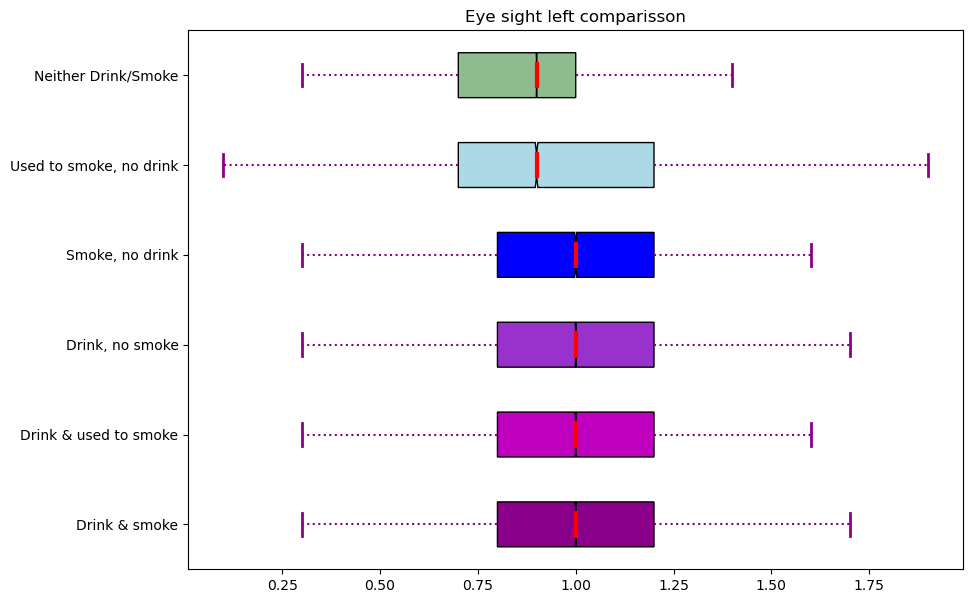

In [57]:
# Creating dataset
np.random.seed(10)
data_1 = drinkers_csmokers['sight_left']
data_2 = drinkers_psmokers['sight_left']
data_3 = drinkers_nsmokers['sight_left']
data_4 = nondrinkers_csmokers['sight_left']
data_5 = nondrinkers_psmokers['sight_left']
data_6 = nondrinkers_nsmokers['sight_left']
data = [data_1, data_2, data_3, data_4, data_5, data_6]

fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)

# Creating axes instance
bp = ax.boxplot(data, patch_artist = True,
				notch ='True', vert = 0, showfliers=False)

colors = ['darkmagenta', 'm',
		'darkorchid', 'b', 'lightblue', 'darkseagreen']

for patch, color in zip(bp['boxes'], colors):
	patch.set_facecolor(color)

# changing color and linewidth of
# whiskers
for whisker in bp['whiskers']:
	whisker.set(color ='#8B008B',
				linewidth = 1.5,
				linestyle =":")

# changing color and linewidth of
# caps
for cap in bp['caps']:
	cap.set(color ='#8B008B',
			linewidth = 2)

# changing color and linewidth of
# medians
for median in bp['medians']:
	median.set(color ='red',
			linewidth = 3)

# changing style of fliers
for flier in bp['fliers']:
	flier.set(marker ='D',
			color ='#e7298a',
			alpha = 0.5)
	
# x-axis labels
ax.set_yticklabels(['Drink & smoke', 'Drink & used to smoke',
					'Drink, no smoke', 'Smoke, no drink', 'Used to smoke, no drink', 'Neither Drink/Smoke'])

# Adding title
plt.title("Eye sight left comparisson")

# Removing top axes and right axes
# ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
	
# show plot
plt.show()

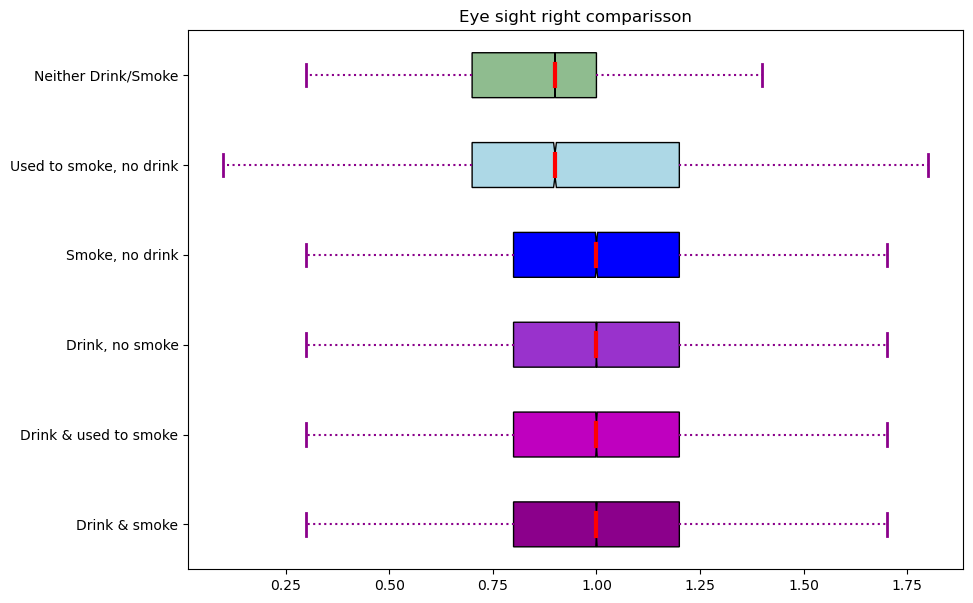

In [58]:
# Creating dataset
np.random.seed(10)
data_1 = drinkers_csmokers['sight_right']
data_2 = drinkers_psmokers['sight_right']
data_3 = drinkers_nsmokers['sight_right']
data_4 = nondrinkers_csmokers['sight_right']
data_5 = nondrinkers_psmokers['sight_right']
data_6 = nondrinkers_nsmokers['sight_right']
data = [data_1, data_2, data_3, data_4, data_5, data_6]

fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)

# Creating axes instance
bp = ax.boxplot(data, patch_artist = True,
				notch ='True', vert = 0, showfliers=False)

colors = ['darkmagenta', 'm',
		'darkorchid', 'b', 'lightblue', 'darkseagreen']

for patch, color in zip(bp['boxes'], colors):
	patch.set_facecolor(color)

# changing color and linewidth of
# whiskers
for whisker in bp['whiskers']:
	whisker.set(color ='#8B008B',
				linewidth = 1.5,
				linestyle =":")

# changing color and linewidth of
# caps
for cap in bp['caps']:
	cap.set(color ='#8B008B',
			linewidth = 2)

# changing color and linewidth of
# medians
for median in bp['medians']:
	median.set(color ='red',
			linewidth = 3)

# changing style of fliers
for flier in bp['fliers']:
	flier.set(marker ='D',
			color ='#e7298a',
			alpha = 0.5)
	
# x-axis labels
ax.set_yticklabels(['Drink & smoke', 'Drink & used to smoke',
					'Drink, no smoke', 'Smoke, no drink', 'Used to smoke, no drink', 'Neither Drink/Smoke'])

# Adding title
plt.title("Eye sight right comparisson")

# Removing top axes and right axes
# ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
	
# show plot
plt.show()

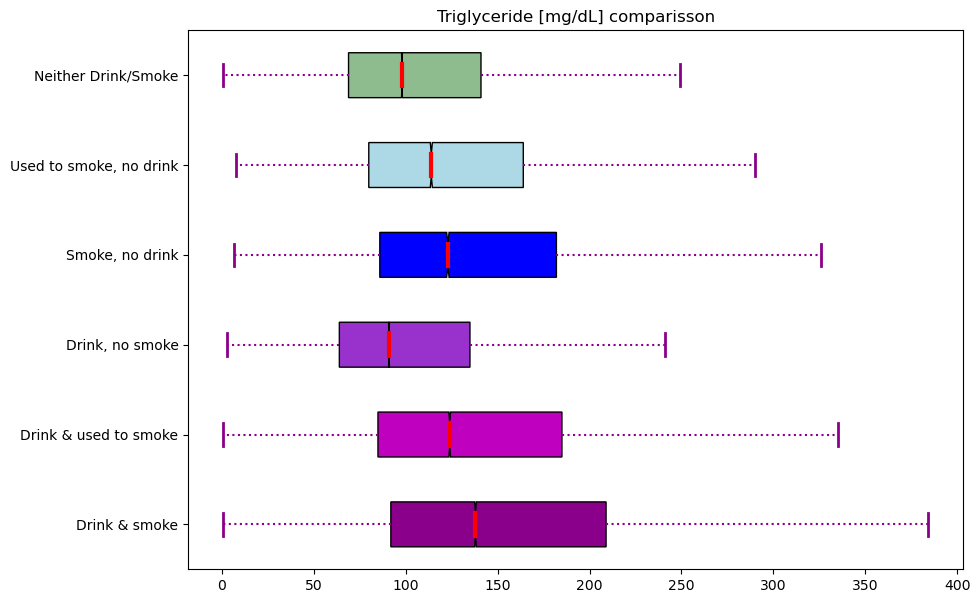

In [59]:
# Creating dataset
np.random.seed(10)
data_1 = drinkers_csmokers['triglyceride']
data_2 = drinkers_psmokers['triglyceride']
data_3 = drinkers_nsmokers['triglyceride']
data_4 = nondrinkers_csmokers['triglyceride']
data_5 = nondrinkers_psmokers['triglyceride']
data_6 = nondrinkers_nsmokers['triglyceride']
data = [data_1, data_2, data_3, data_4, data_5, data_6]

fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)

# Creating axes instance
bp = ax.boxplot(data, patch_artist = True,
				notch ='True', vert = 0, showfliers=False)

colors = ['darkmagenta', 'm',
		'darkorchid', 'b', 'lightblue', 'darkseagreen']

for patch, color in zip(bp['boxes'], colors):
	patch.set_facecolor(color)

# changing color and linewidth of
# whiskers
for whisker in bp['whiskers']:
	whisker.set(color ='#8B008B',
				linewidth = 1.5,
				linestyle =":")

# changing color and linewidth of
# caps
for cap in bp['caps']:
	cap.set(color ='#8B008B',
			linewidth = 2)

# changing color and linewidth of
# medians
for median in bp['medians']:
	median.set(color ='red',
			linewidth = 3)

# changing style of fliers
for flier in bp['fliers']:
	flier.set(marker ='D',
			color ='#e7298a',
			alpha = 0.5)
	
# x-axis labels
ax.set_yticklabels(['Drink & smoke', 'Drink & used to smoke',
					'Drink, no smoke', 'Smoke, no drink', 'Used to smoke, no drink', 'Neither Drink/Smoke'])

# Adding title
plt.title("Triglyceride [mg/dL] comparisson")

# Removing top axes and right axes
# ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
	
# show plot
plt.show()

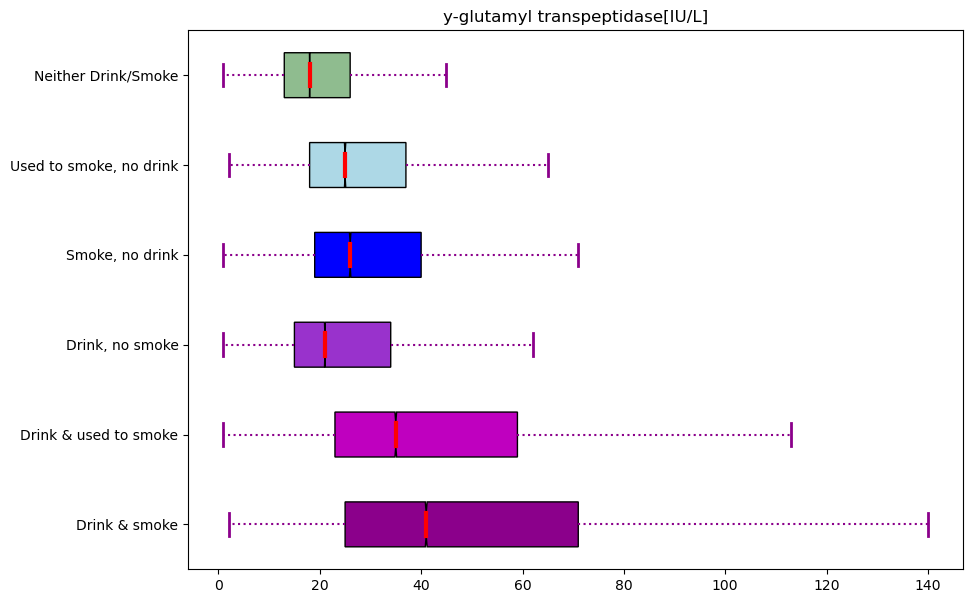

In [60]:
# Creating dataset
np.random.seed(10)
data_1 = drinkers_csmokers['gamma_GTP']
data_2 = drinkers_psmokers['gamma_GTP']
data_3 = drinkers_nsmokers['gamma_GTP']
data_4 = nondrinkers_csmokers['gamma_GTP']
data_5 = nondrinkers_psmokers['gamma_GTP']
data_6 = nondrinkers_nsmokers['gamma_GTP']
data = [data_1, data_2, data_3, data_4, data_5, data_6]

fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)

# Creating axes instance
bp = ax.boxplot(data, patch_artist = True,
				notch ='True', vert = 0, showfliers=False)

colors = ['darkmagenta', 'm',
		'darkorchid', 'b', 'lightblue', 'darkseagreen']

for patch, color in zip(bp['boxes'], colors):
	patch.set_facecolor(color)

# changing color and linewidth of
# whiskers
for whisker in bp['whiskers']:
	whisker.set(color ='#8B008B',
				linewidth = 1.5,
				linestyle =":")

# changing color and linewidth of
# caps
for cap in bp['caps']:
	cap.set(color ='#8B008B',
			linewidth = 2)

# changing color and linewidth of
# medians
for median in bp['medians']:
	median.set(color ='red',
			linewidth = 3)

# changing style of fliers
for flier in bp['fliers']:
	flier.set(marker ='D',
			color ='#e7298a',
			alpha = 0.5)
	
# x-axis labels
ax.set_yticklabels(['Drink & smoke', 'Drink & used to smoke',
					'Drink, no smoke', 'Smoke, no drink', 'Used to smoke, no drink', 'Neither Drink/Smoke'])

# Adding title
plt.title("y-glutamyl transpeptidase[IU/L]")

# Removing top axes and right axes
# ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
	
# show plot
plt.show()

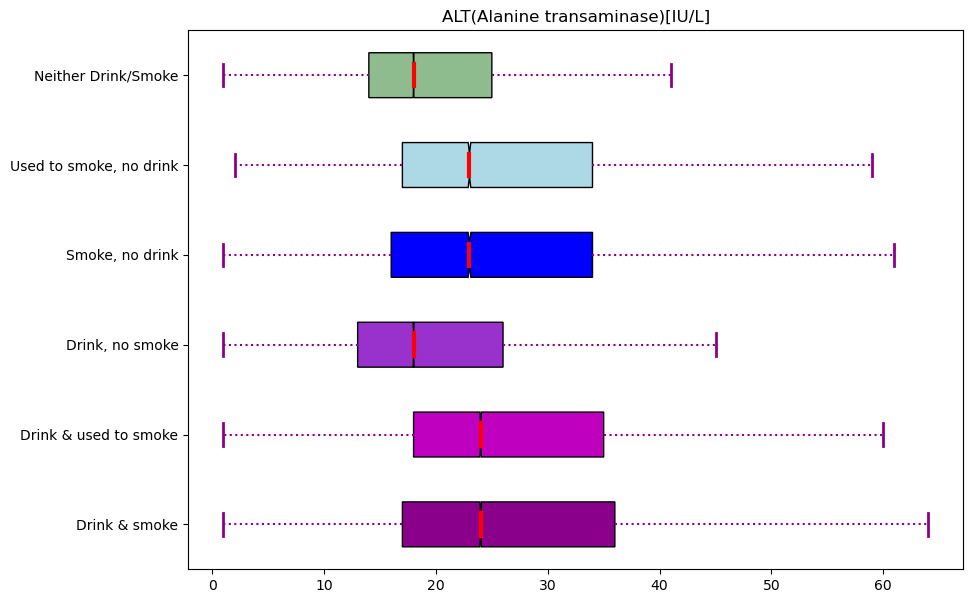

In [61]:
# Creating dataset
np.random.seed(10)
data_1 = drinkers_csmokers['SGOT_ALT']
data_2 = drinkers_psmokers['SGOT_ALT']
data_3 = drinkers_nsmokers['SGOT_ALT']
data_4 = nondrinkers_csmokers['SGOT_ALT']
data_5 = nondrinkers_psmokers['SGOT_ALT']
data_6 = nondrinkers_nsmokers['SGOT_ALT']
data = [data_1, data_2, data_3, data_4, data_5, data_6]

fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)

# Creating axes instance
bp = ax.boxplot(data, patch_artist = True,
				notch ='True', vert = 0, showfliers=False)

colors = ['darkmagenta', 'm',
		'darkorchid', 'b', 'lightblue', 'darkseagreen']

for patch, color in zip(bp['boxes'], colors):
	patch.set_facecolor(color)

# changing color and linewidth of
# whiskers
for whisker in bp['whiskers']:
	whisker.set(color ='#8B008B',
				linewidth = 1.5,
				linestyle =":")

# changing color and linewidth of
# caps
for cap in bp['caps']:
	cap.set(color ='#8B008B',
			linewidth = 2)

# changing color and linewidth of
# medians
for median in bp['medians']:
	median.set(color ='red',
			linewidth = 3)

# changing style of fliers
for flier in bp['fliers']:
	flier.set(marker ='D',
			color ='#e7298a',
			alpha = 0.5)
	
# x-axis labels
ax.set_yticklabels(['Drink & smoke', 'Drink & used to smoke',
					'Drink, no smoke', 'Smoke, no drink', 'Used to smoke, no drink', 'Neither Drink/Smoke'])

# Adding title
plt.title("ALT(Alanine transaminase)[IU/L]")

# Removing top axes and right axes
# ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
	
# show plot
plt.show()

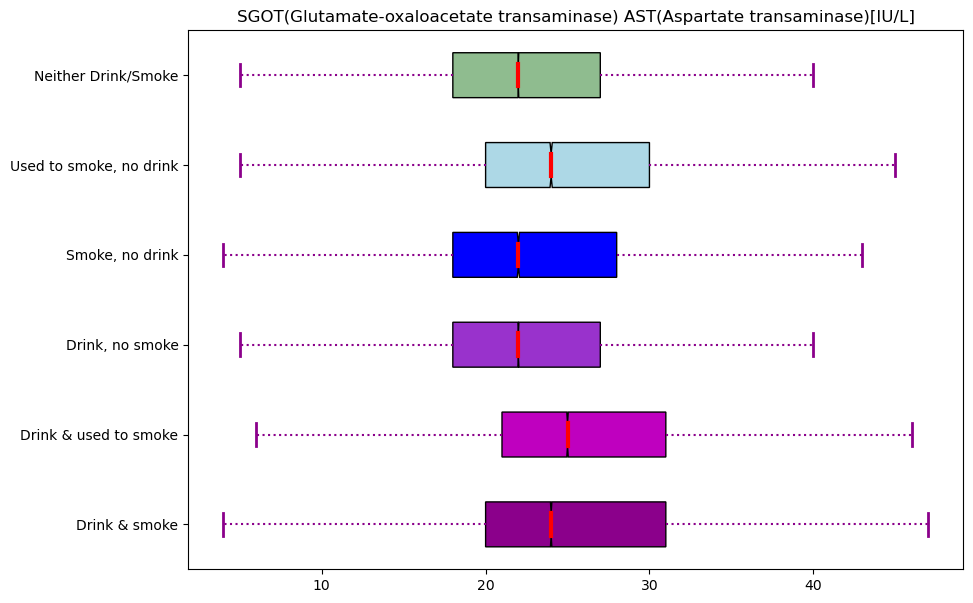

In [62]:
# Creating dataset
np.random.seed(10)
data_1 = drinkers_csmokers['SGOT_AST']
data_2 = drinkers_psmokers['SGOT_AST']
data_3 = drinkers_nsmokers['SGOT_AST']
data_4 = nondrinkers_csmokers['SGOT_AST']
data_5 = nondrinkers_psmokers['SGOT_AST']
data_6 = nondrinkers_nsmokers['SGOT_AST']
data = [data_1, data_2, data_3, data_4, data_5, data_6]

fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)

# Creating axes instance
bp = ax.boxplot(data, patch_artist = True,
				notch ='True', vert = 0, showfliers=False)

colors = ['darkmagenta', 'm',
		'darkorchid', 'b', 'lightblue', 'darkseagreen']

for patch, color in zip(bp['boxes'], colors):
	patch.set_facecolor(color)

# changing color and linewidth of
# whiskers
for whisker in bp['whiskers']:
	whisker.set(color ='#8B008B',
				linewidth = 1.5,
				linestyle =":")

# changing color and linewidth of
# caps
for cap in bp['caps']:
	cap.set(color ='#8B008B',
			linewidth = 2)

# changing color and linewidth of
# medians
for median in bp['medians']:
	median.set(color ='red',
			linewidth = 3)

# changing style of fliers
for flier in bp['fliers']:
	flier.set(marker ='D',
			color ='#e7298a',
			alpha = 0.5)
	
# x-axis labels
ax.set_yticklabels(['Drink & smoke', 'Drink & used to smoke',
					'Drink, no smoke', 'Smoke, no drink', 'Used to smoke, no drink', 'Neither Drink/Smoke'])

# Adding title
plt.title("SGOT(Glutamate-oxaloacetate transaminase) AST(Aspartate transaminase)[IU/L]")

# Removing top axes and right axes
# ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
	
# show plot
plt.show()

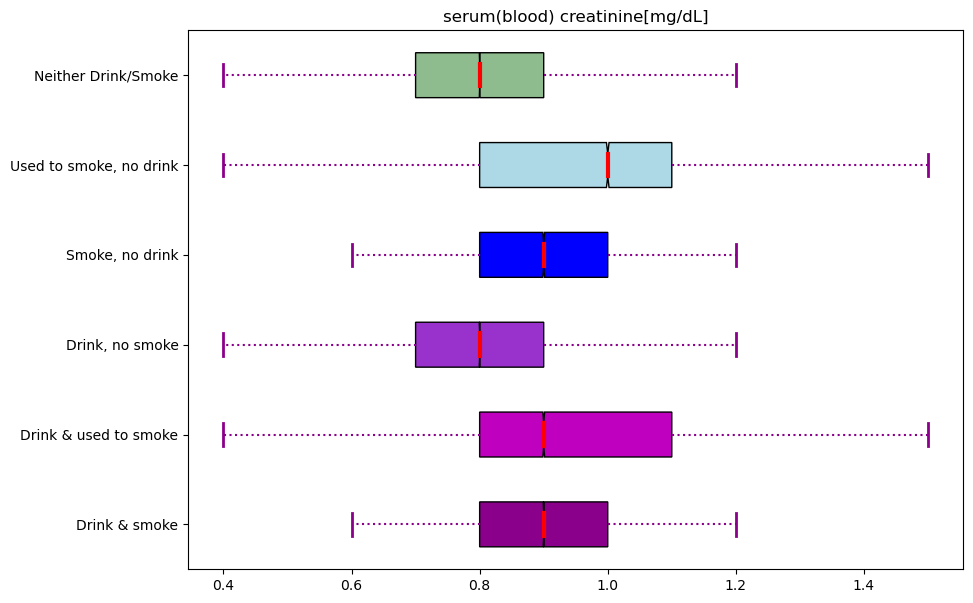

In [63]:
# Creating dataset
np.random.seed(10)
data_1 = drinkers_csmokers['serum_creatinine']
data_2 = drinkers_psmokers['serum_creatinine']
data_3 = drinkers_nsmokers['serum_creatinine']
data_4 = nondrinkers_csmokers['serum_creatinine']
data_5 = nondrinkers_psmokers['serum_creatinine']
data_6 = nondrinkers_nsmokers['serum_creatinine']
data = [data_1, data_2, data_3, data_4, data_5, data_6]

fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)

# Creating axes instance
bp = ax.boxplot(data, patch_artist = True,
				notch ='True', vert = 0, showfliers=False)

colors = ['darkmagenta', 'm',
		'darkorchid', 'b', 'lightblue', 'darkseagreen']

for patch, color in zip(bp['boxes'], colors):
	patch.set_facecolor(color)

# changing color and linewidth of
# whiskers
for whisker in bp['whiskers']:
	whisker.set(color ='#8B008B',
				linewidth = 1.5,
				linestyle =":")

# changing color and linewidth of
# caps
for cap in bp['caps']:
	cap.set(color ='#8B008B',
			linewidth = 2)

# changing color and linewidth of
# medians
for median in bp['medians']:
	median.set(color ='red',
			linewidth = 3)

# changing style of fliers
for flier in bp['fliers']:
	flier.set(marker ='D',
			color ='#e7298a',
			alpha = 0.5)
	
# x-axis labels
ax.set_yticklabels(['Drink & smoke', 'Drink & used to smoke',
					'Drink, no smoke', 'Smoke, no drink', 'Used to smoke, no drink', 'Neither Drink/Smoke'])

# Adding title
plt.title("serum(blood) creatinine[mg/dL]")

# Removing top axes and right axes
# ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
	
# show plot
plt.show()

# The following analysis was completed by Zohir Benmalek and assisted in confirming the previusly performed analysis on correlations. 

/***************************************************************************************
*    Title: Smoker and drinkers analysis and classification
*    Author: Zohir Benmalek
*    Date: 08/30/2023
*    Availability: https://www.kaggle.com/code/zohirmalek/smoker-and-drinkers-analysis-and-classification
*
***************************************************************************************/

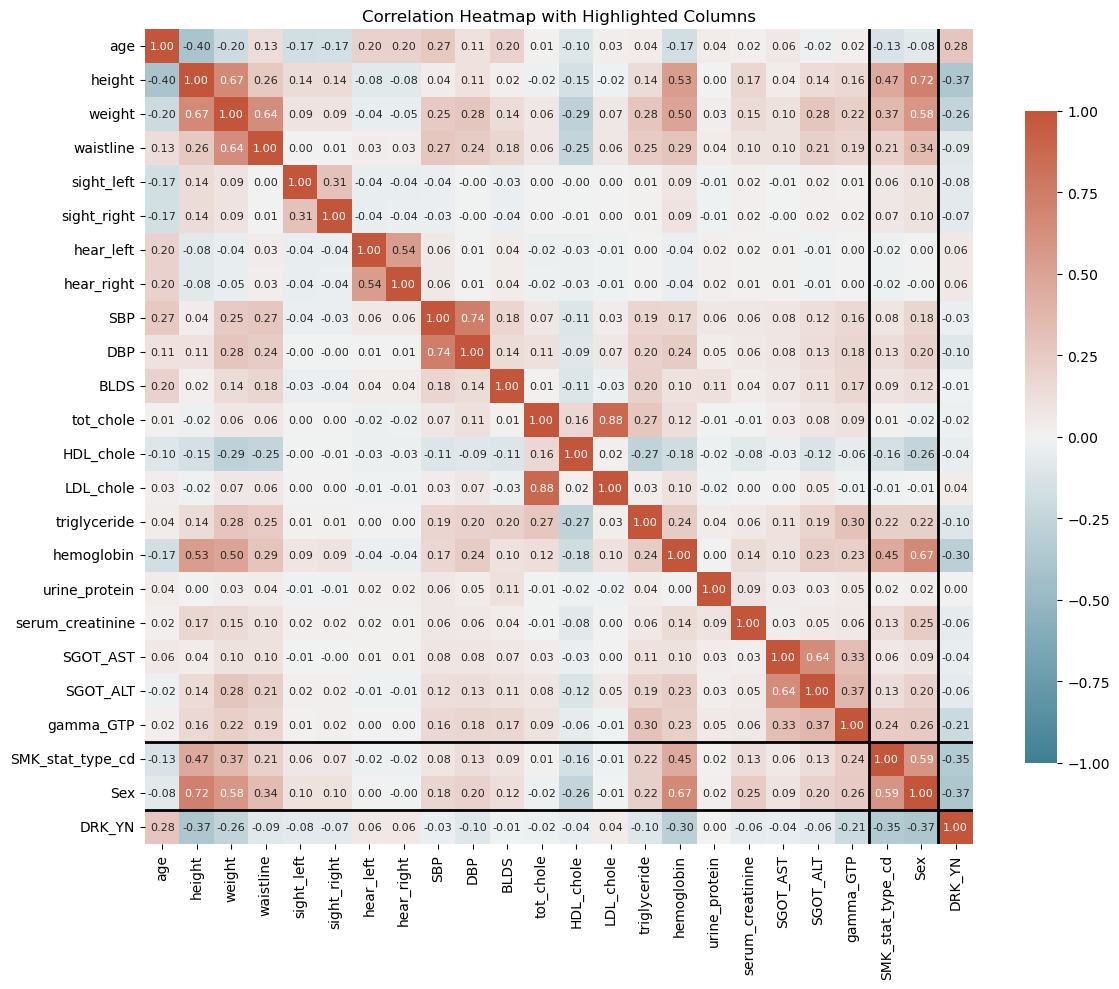

In [64]:
correlation_matrix = df.corr()


# Specify columns to highlight
highlight_cols = ['DRK_YN', 'SMK_stat_type_cd']

# Create a larger heatmap with adjusted font size
plt.figure(figsize=(12, 10))

# Define custom color palette for the heatmap
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Plot the heatmap with custom colors for highlighted columns
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, center=0, fmt=".2f", annot_kws={"size": 8},
            cbar_kws={"shrink": 0.8}, vmin=-1, vmax=1)

# Highlight columns by drawing lines around them
for i in range(len(correlation_matrix.columns)):
    if correlation_matrix.columns[i] in highlight_cols:
        plt.axhline(i, color='k', linewidth=2)
        plt.axvline(i, color='k', linewidth=2)

plt.title('Correlation Heatmap with Highlighted Columns')
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [65]:
correlation_threshold = 0.1
DRK_features = []
for feature in correlation_matrix.columns:
    if feature != 'DRK_YN' and (correlation_matrix[feature]['DRK_YN'] > correlation_threshold or
                                correlation_matrix[feature]['DRK_YN'] < -correlation_threshold):
        DRK_features.append(feature)

print("Correlated features with 'DRK_YN':")
print(DRK_features)

Correlated features with 'DRK_YN':
['age', 'height', 'weight', 'DBP', 'triglyceride', 'hemoglobin', 'gamma_GTP', 'SMK_stat_type_cd', 'Sex']


In [66]:
correlation_threshold = 0.1
SMK_features = []
for feature in correlation_matrix.columns:
    if feature != 'SMK_stat_type_cd' and (correlation_matrix[feature]['SMK_stat_type_cd'] > correlation_threshold or
                                correlation_matrix[feature]['SMK_stat_type_cd'] < -correlation_threshold):
        SMK_features.append(feature)

print("Correlated features with 'SMK_stat_type_cd':")
print(SMK_features)

Correlated features with 'SMK_stat_type_cd':
['age', 'height', 'weight', 'waistline', 'DBP', 'HDL_chole', 'triglyceride', 'hemoglobin', 'serum_creatinine', 'SGOT_ALT', 'gamma_GTP', 'Sex', 'DRK_YN']


In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Drinker

In [68]:
# Select the features and target variable
X = df[DRK_features]
y = df['DRK_YN']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [69]:
# Initialize and train a Random Forest classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Predict the target variable on the test set
y_pred = model.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7110707620920966


In [70]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.73      0.72     98675
           1       0.72      0.69      0.71     99595

    accuracy                           0.71    198270
   macro avg       0.71      0.71      0.71    198270
weighted avg       0.71      0.71      0.71    198270



# Smoker

In [71]:
# Select the features and target variable
X = df[SMK_features]
y = df['SMK_stat_type_cd']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict the target variable on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.698386039239421


In [72]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.82      0.85      0.84    120582
         2.0       0.44      0.36      0.40     34919
         3.0       0.52      0.56      0.54     42769

    accuracy                           0.70    198270
   macro avg       0.59      0.59      0.59    198270
weighted avg       0.69      0.70      0.69    198270

